# Project 2: Housing Prices in Ames

## Problem Statement

To predict the sales price of houses in Ames using a Ridge regression model by understanding the relationships between the different aspects of a home and its price.

The model can be used to guide the valuation of homes by buyers and sellers alike. Potential limitations of the model could be due the lack of ability to study past trends and economic conditions. The success of the model is evaluated through r-squared and RMSE, which is in line with the scoring in Kaggle.

## Executive Summary

Data cleaning, visualisation and pre-processing was done before running three regression models to predict house prices in Ames, Iowa. The major issues in data cleaning were missing values, which were imputed and some outliers. Features were also combined and some of the variables were dropped to prevent multicollinearity. The three models used were linear, ridge and lasso regressions, of which ridge was in the end chosen as the production model. 

The model found that above grade (ground) living area square feet, overall quality of the homes and two of the neighbourhoods are the biggest contribution factors to sale price. Size, quality and location have always been the most important factors in home purchase. To increase sale price, home owners can focus on improving overall quality and exterior quality of their homes. 

To generalise this model to other cities, we need information on the tastes and preferences of people in other cities by getting hold of data on population demography - age, income, race, etc. 

### Contents:
- [Data Import](#Data-Import)
    * [Read Data](#Read-Data)
    * [Display Data](#Display-Data)
- [Exploratory Data Analysis and Cleaning](#Exploratory-Data-Analysis-and-Cleaning)
    * [Finding and Imputing Missing Values](#Finding-and-Imputing-Missing-Values)
    * [Visualise Data and Identify Outliers](#Visualise-Data-and-Identify-Outliers)
    * [Discrete Values - Categorical or Continuous?](#Discrete-Values---Categorical-or-Continuous?)
    * [Combine Features](#Combine-Features)
- [Exploratory Visualisations](#Exploratory-Visualisations)
    * [Correlations](#Correlations)
    * [Distributions](#Distributions)
    * [Scatterplots and Boxplots](#Scatterplots-and-Boxplots)
- [Pre-processing](#Preprocessing)
    * [Processing Categorical Variables](#Processing-Categorical-Variables)
    * [Train/Test Split](#Train/Test-Split)
    * [Scale Data](#Scale-Data)
- [Modeling](#Modeling)
    * [Linear Regression](#Linear-Regression)
    * [Ridge Regression](#Ridge-Regression)
    * [Lasso Regression](#Lasso-Regression)
    * [Tweaking Features to Improve Model](#Tweaking-Features-to-Improve-Model)
    * [Rerun Regressions](#Rerun-Regressions)
    * [Inferential Visualisation](#Inferential-Visualisation)
- [Business Recommendations](#Business-Recommendations)

*Importing libraries*

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Import

#### Read Data

In [11]:
#There is a column that can be set as the index while reading the data
ames_train = pd.read_csv('../datasets/train.csv')
ames_test = pd.read_csv('../datasets/test.csv')

#### Display Data

In [12]:
ames_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [13]:
#Check the shape against the description in Kaggle
print(ames_train.shape)
print(ames_test.shape)

(2051, 81)
(879, 80)


The test set has one column fewer than the train set as described in Kaggle. Next, we check if the column removed is indeed 'SalePrice'.

In [14]:
#Check that the column that differs is the 'SalePrice'
list(ames_test.columns) == list(ames_train.drop('SalePrice', axis=1).columns)

True

#### Data Dictionary

|S/N|Feature|DataType|Type|Description|
|---|---|---|---|---|
|0|Id|int64|Discrete|Observation number|
|1|PID|int64|Nominal|Parcel identification number  - can be used with city web site for parcel review.|
|2|MSSubClass|int64|Nominal|Identifies the type of dwelling involved in the sale.|
|3|MSZoning|object|Nominal|Identifies the general zoning classification of the sale.|
|4|LotFrontage|float64|Continuous|Linear feet of street connected to property.|
|5|LotArea|int64|Continuous|Lot size in square feet|
|6|Street|object|Nominal|Type of road access to property.|
|7|Alley|object|Nominal|Type of alley access to property.|
|8|LotShape|object|Ordinal|General shape of property.|
|9|LandContour|object|Nominal|Flatness of the property.|
|10|Utilities|object|Ordinal|Type of utilities available.|
|11|LotConfig|object|Nominal|Lot configuration.|
|12|LandSlope|object|Ordinal|Slope of property.|
|13|Neighborhood|object|Nominal|Physical locations within Ames city limits.|
|14|Condition1|object|Nominal|Proximity to various conditions.|
|15|Condition2|object|Nominal|Proximity to various conditions (if more than one is present).|
|16|BldgType|object|Nominal|Type of dwelling.|
|17|HouseStyle|object|Nominal|Style of dwelling.|
|18|OverallQual|int64|Ordinal|Rates the overall material and finish of the house.|
|19|OverallCond|int64|Ordinal|Rates the overall condition of the house.|
|20|YearBuilt|int64|Discrete|Original construction date.|
|21|YearRemod/Add|int64|Discrete|Remodel date (same as construction date if no remodeling or additions).|
|22|RoofStyle|object|Nominal|Type of roof.|
|23|RoofMatl|object|Nominal|Roof material.|
|24|Exterior1st|object|Nominal|Exterior covering on house.|
|25|Exterior2nd|object|Nominal|Exterior covering on house (if more than one material).|
|26|MasVnrType|object|Nominal|Masonry veneer type.|
|27|MasVnrArea|float64|Continuous|Masonry veneer area in square feet.|
|28|ExterQual|object|Ordinal|Evaluates the quality of the material on the exterior.| 
|29|ExterCond|object|Ordinal|Evaluates the present condition of the material on the exterior.|
|30|Foundation|object|Nominal|Type of foundation.|
|31|BsmtQual|object|Ordinal|Evaluates the height of the basement.|
|32|BsmtCond|object|Ordinal|Evaluates the general condition of the basement.|
|33|BsmtExposure|object|Ordinal|Refers to walkout or garden level walls.|
|34|BsmtFinType1|object|Ordinal|Rating of basement finished area.|
|35|BsmtFinSF1|float64|Continuous|Type 1 finished square feet.|
|36|BsmtFinType2|object|Ordinal|Rating of basement finished area (if multiple types).|
|37|BsmtFinSF2|float64|Continuous|Type 2 finished square feet.|
|38|BsmtUnfSF|float64|Continuous|Unfinished square feet of basement area.|
|39|TotalBsmtSF|float64|Continuous|Total square feet of basement area.|
|40|Heating|object|Nominal|Type of heating.|
|41|HeatingQc|object|Ordinal|Heating quality and condition.|
|42|CentralAir|object|Nominal|Central air conditioning.|
|43|Electrical|object|Ordinal|Electrical system.|
|44|1stflrSF|int64|Continuous|First Floor square feet.|
|45|2ndflrSF|int64|Continuous|Second floor square feet.|
|46|LowQualFinSF|int64|Continuous|Low quality finished square feet (all floors)|
|47|GrLivArea|int64|Continuous|Above grade (ground) living area square feet.|
|48|BsmtFullBath|float64|Discrete|Basement full bathrooms.|
|49|BsmtHalfBath|float64|Discrete|Basement half bathrooms.|
|50|FullBath|int64|Discrete|Full bathrooms above grade.|
|51|HalfBath|int64|Discrete|Half baths above grade.|
|52|BedroomAbvgr|int64|Discrete|Bedrooms above grade (does NOT include basement bedrooms).|
|53|KitchenAbvgr|int64|Discrete|Kitchens above grade|
|54|KitchenQual|object|Ordinal|Kitchen quality.|
|55|TotrmsAbvgrd|int64|Discrete|Total rooms above grade (does not include bathrooms).|
|56|Functional|object|Ordinal|Home functionality (Assume typical unless deductions are warranted).|
|57|Fireplaces|int64|Discrete|Number of fireplaces|
|58|FireplaceQu|object|Ordinal|Fireplace quality|
|59|GarageType|object|Nominal|Garage location|
|60|GarageYrBlt|float64|Discrete|Year garage was built|
|61|GarageFinish|object|Ordinal|Interior finish of the garage|
|62|GarageCars|float64|Discrete|Size of garage in car capacity|
|63|GarageArea|float64|Continuous|Size of garage in square feet|
|64|GarageQual|object|Ordinal|Garage quality|
|65|GarageCond|object|Ordinal|Garage condition|
|66|PavedDrive|object|Ordinal|Paved driveway|
|67|WoodDeckSF|int64|Continuous|Wood deck area in square feet|
|68|OpenPorchSF|int64|Continuous|Open porch area in square feet|
|69|EnclosedPorch|int64|Continuous|Enclosed porch area in square feet|
|70|3SsnPorch|int64|Continuous|Three season porch area in square feet|
|71|ScreenPorch|int64|Continuous|Screen porch area in square feet|
|72|PoolArea|int64|Continuous|Pool area in square feet|
|73|PoolQC|object|Ordinal|Pool quality|
|74|Fence|object|Ordinal|Fence quality|
|75|MiscFeature|object|Nominal|Miscellaneous feature not covered in other categories|
|76|MiscVal|int64|Continuous|$Value of miscellaneous feature|
|77|MoSold|int64|Discrete|Month Sold (MM)|
|78|YrSold|int64|Discrete|Year Sold (YYYY)|
|79|SaleType|object|Nominal|Type of sale|
|80|SalePrice|int64|Continuous|Sale price|

From the above data dictionary, we see that there are 4 types of variables - discrete, continuous, nominal and ordinal. The data set used in this project describes the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables involved in assessing home values.

The categorical variables are: 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'. Their descriptions are as above.

## Exploratory Data Analysis and Cleaning

#### Finding and Imputing Missing Values 

In [15]:
#Getting the number of rows of train and test sets 
#so that we can split the concatenated dataset after cleaning
ntrain = ames_train.shape[0]
ntest = ames_test.shape[0]

In [16]:
#Set target variable to merge back with data later
y = ames_train['SalePrice']

In [17]:
#Concatenate the two data frames so that they can be cleaned the same way 
#since we assume that both sets are drawn from the same distribution 
all_ames = pd.concat((ames_train, ames_test))
#Drop 'SalePrice' from the training set because we do not know the target on the test set
all_ames.drop('SalePrice',axis=1, inplace = True)
print('all_ames size is: {}'.format(all_ames.shape))

all_ames size is: (2930, 80)


In [18]:
#Remove the empty space in column names
all_ames.columns = [x.replace(' ', '') for x in all_ames.columns]

In [19]:
#Calculate the percentage of missing values
all_ames_na = (all_ames.isnull().sum() / len(all_ames)) * 100
    
#Drop columns with 0 missing values and sort columns with missing values by descending order
all_ames_na = all_ames_na.drop(all_ames_na[all_ames_na == 0].index).sort_values(ascending=False)
    
#Put into dataframe
missing_values = pd.DataFrame({'Percentage Missing': all_ames_na})

#Display variables with missing values
print('The variables with missing values are: \n', missing_values.index)

The variables with missing values are: 
 Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath',
       'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'GarageArea', 'Electrical'],
      dtype='object')


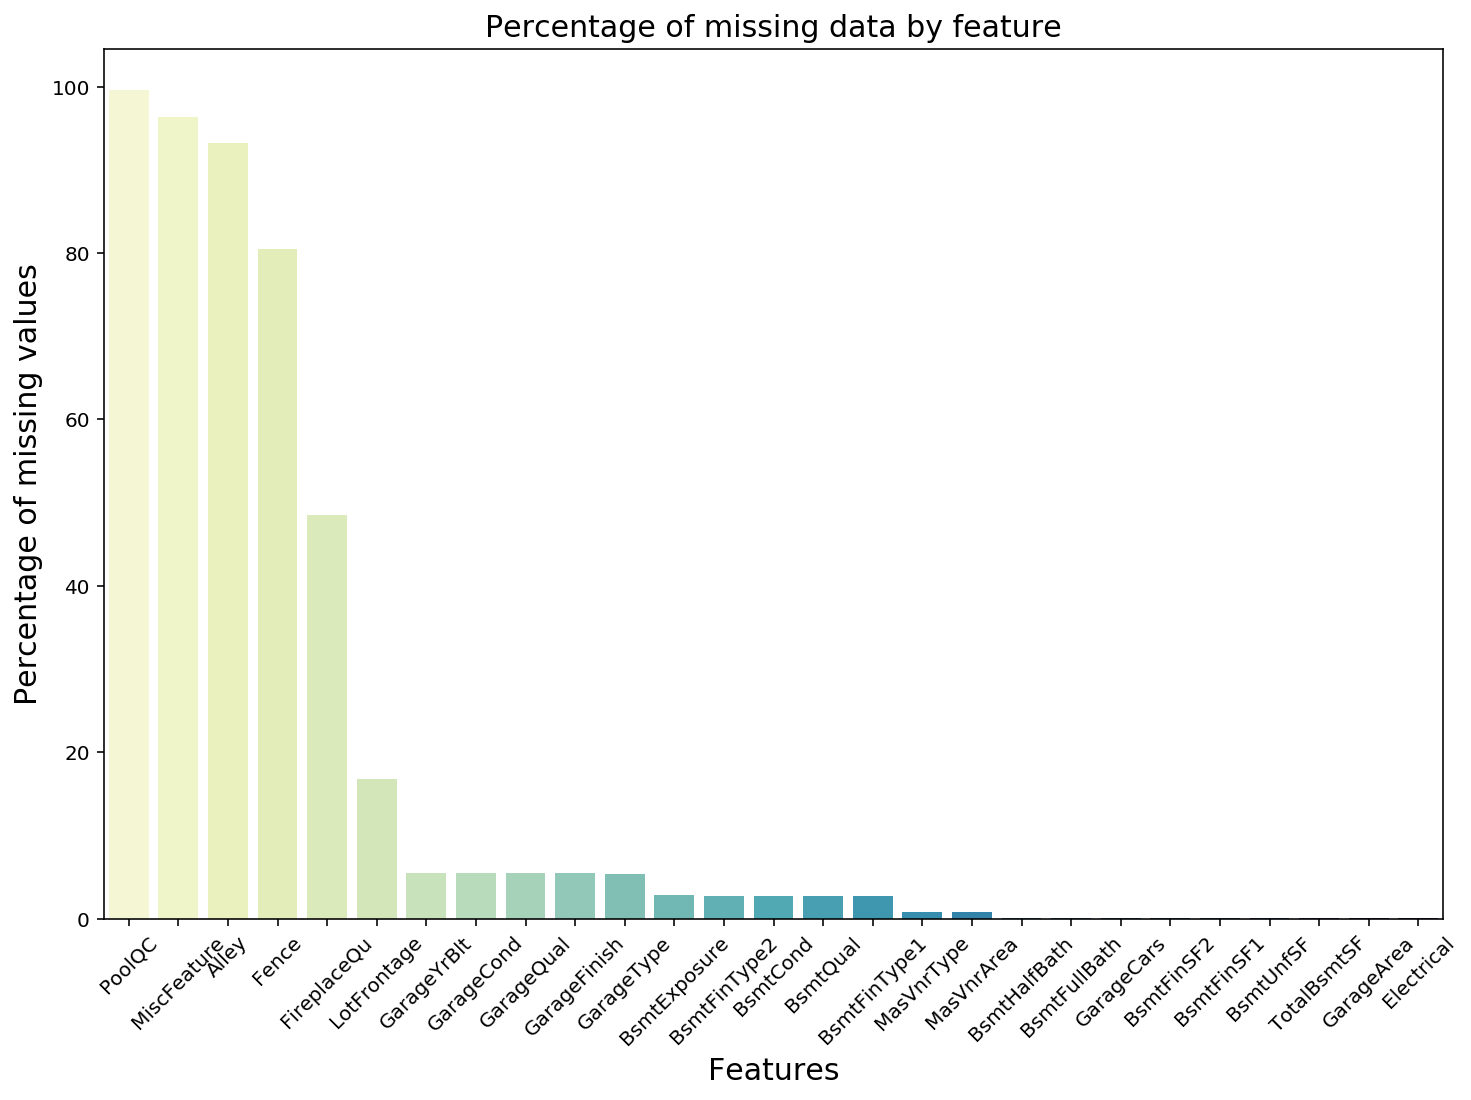

In [20]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='45')
sns.barplot(x=missing_values.index, y='Percentage Missing',data=missing_values, palette='YlGnBu');

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage of missing data by feature', fontsize=15);

Impute the missing values using the data description given.

In [21]:
#PoolQC: data description says NA means 'No Pool', which makes sense because the majority of houses have no pool.
all_ames['PoolQC'] = all_ames['PoolQC'].fillna('None')

#MiscFeature: data description says NA means 'No isc feature'
all_ames['MiscFeature'] = all_ames['MiscFeature'].fillna('None')

#Alley: data description says NA means 'No Alley Access'
all_ames['Alley'] = all_ames['Alley'].fillna('None')

#Fence: data description says NA means 'No Fence'
all_ames['Fence'] = all_ames['Fence'].fillna('None')

#FireplaceQu: data description says NA means 'No Fireplace'
all_ames['FireplaceQu'] = all_ames['FireplaceQu'].fillna('None')

#Fill in 'Lot Frontage' missing values with the mean of the 'Lot Frontage' of each 'Neighborhood'
#since it is a continuous variable
all_ames['LotFrontage']  = all_ames.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

#For all data to do with garage, NA means 'No Garage'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_ames[col] = all_ames[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_ames[col] = all_ames[col].fillna(0)

#For all data to do with basement, NA means 'No Basement'
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_ames[col] = all_ames[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_ames[col] = all_ames[col].fillna('None')

#Mas Vnr Type: data description says 'None' refers to 'None' i.e. no veneer   
all_ames["MasVnrType"] = all_ames["MasVnrType"].fillna("None")
all_ames["MasVnrArea"] = all_ames["MasVnrArea"].fillna(0)

#Fill in 'Electrical' missing values with the mode of the column since it is a categorical variable
all_ames['Electrical'] = all_ames['Electrical'].fillna(all_ames['Electrical'].mode()[0])

In [22]:
#Check for remaining missing values, if any 
all_ames_na = (all_ames.isnull().sum() / len(all_ames)) * 100
all_ames_na = all_ames_na.drop(all_ames_na[all_ames_na == 0].index).sort_values(ascending=False)
missing_value = pd.DataFrame({'Missing Ratio' :all_ames_na})

if len(all_ames_na) == 0:
    print('Variable(s) with remaining missing values: 0')
else:
    print('Variable(s) with remaining missing values: ', missing_value.index)

Variable(s) with remaining missing values:  Index(['LotFrontage'], dtype='object')


In [23]:
#Check if the missing values are due to the entire neighborhoods not having any 'LotFrontage' values at all
#Find the neighborhoods with missing values first
all_ames[all_ames['LotFrontage'].isnull()]['Neighborhood']

463     GrnHill
1121    Landmrk
1211    GrnHill
Name: Neighborhood, dtype: object

In [24]:
#Next, find all the 'LotFrontage' for those neighborhoods
print('Lot Frontage of all homes in GreenHills:')
print(all_ames[all_ames['Neighborhood'] == 'GrnHill']['LotFrontage'], ('\n'))

print('Lot Frontage of all homes in Landmark:') 
print(all_ames[all_ames['Neighborhood'] == 'Landmrk']['LotFrontage'])

Lot Frontage of all homes in GreenHills:
463    NaN
1211   NaN
Name: LotFrontage, dtype: float64 

Lot Frontage of all homes in Landmark:
1121   NaN
Name: LotFrontage, dtype: float64


In [25]:
#Impute mean of all homes for these two neighborhoods
all_ames['LotFrontage']  = all_ames['LotFrontage'].fillna(all_ames['LotFrontage'].mean())

In [26]:
#Check again for missing values
all_ames_na = (all_ames.isnull().sum() / len(all_ames)) * 100
all_ames_na = all_ames_na.drop(all_ames_na[all_ames_na == 0].index).sort_values(ascending=False)

if len(all_ames_na) == 0:
    print('Variables with remaining missing values: 0')
else:
    print('Variables with remaining missing values: ', missing_value.index)

Variables with remaining missing values: 0


#### Visualise Data and Identify Outliers

In [27]:
#Split the train and test sets before removing outliers from the train set
ames_train = all_ames[:ntrain]
ames_test = all_ames[ntrain:]

#Check that they have similar number of rows as previous sets
print('Shape of train dataset: ', ames_train.shape)
print('Shape of test dataset: ', ames_test.shape)

Shape of train dataset:  (2051, 80)
Shape of test dataset:  (879, 80)


In [28]:
#Merge 'SalePrice' back with the rest of the training data
ames_train['SalePrice'] = y

/Users/yvettenee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#Separate numerical variables before plotting
numeric_cols = ames_train.select_dtypes(exclude=['object']).columns
ames_num = ames_train[numeric_cols]

In [30]:
#Scale the numerical data into z-scores
ss = StandardScaler()

#Fit and transform numeric columns
scaled_features = ss.fit_transform(ames_num.values)
scaled_features = pd.DataFrame(scaled_features, index=ames_num.index, columns=ames_num.columns)

In [31]:
#Place numeric columns in a list
cols = [col for col in scaled_features.columns]

In [32]:
#Set threshold for possible outliers
#The following number narrows down the number of variables with possible outliers to a manageable size
thresh = 8

#Drop rows and columns with scaled values lower than 8
scaled2 = scaled_features[scaled_features[cols] > thresh].dropna(how='all').dropna(how='all',axis=1)
scaled2.columns

#Place numeric columns with outliers in a list
cols_out = [col for col in scaled2.columns]

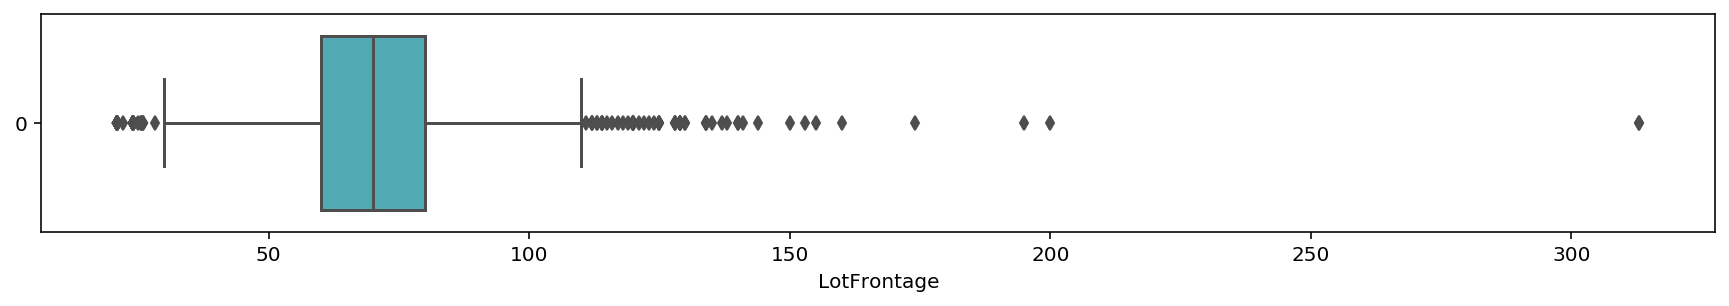

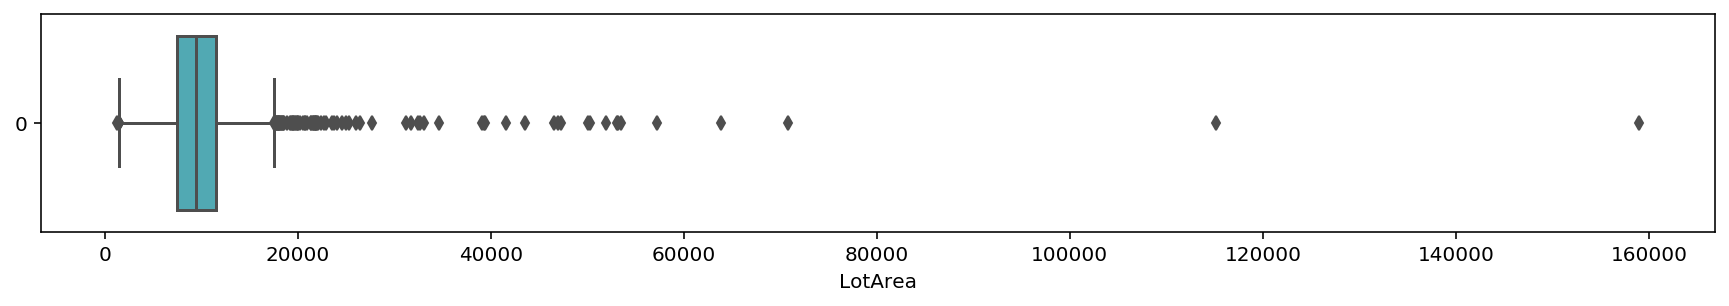

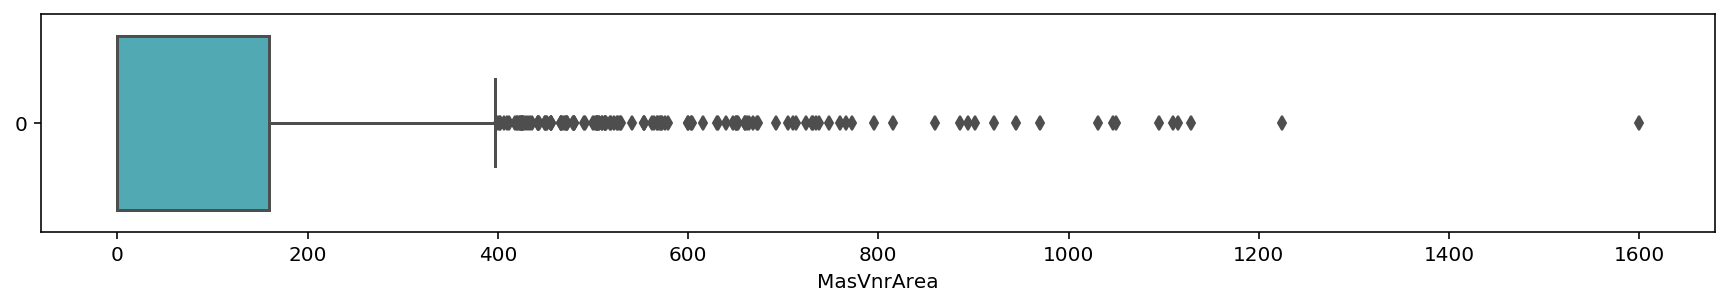

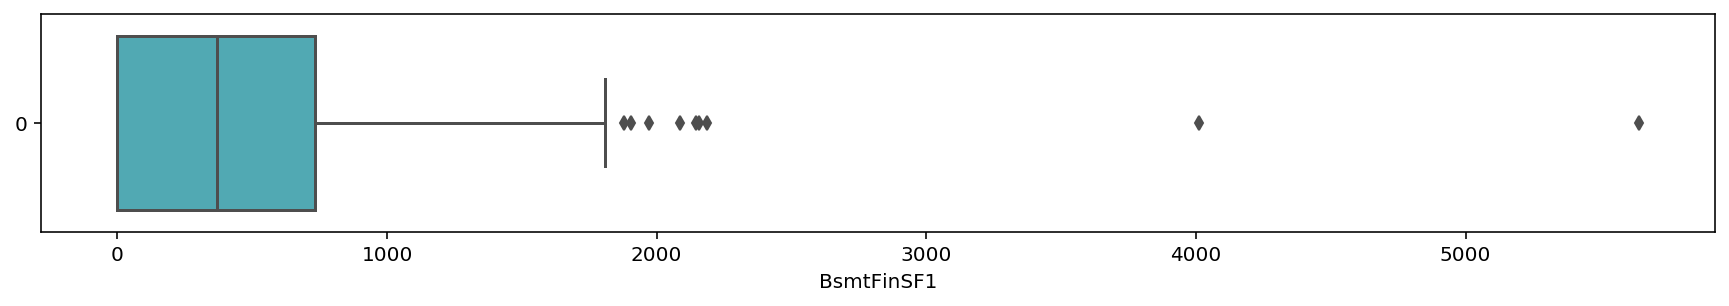

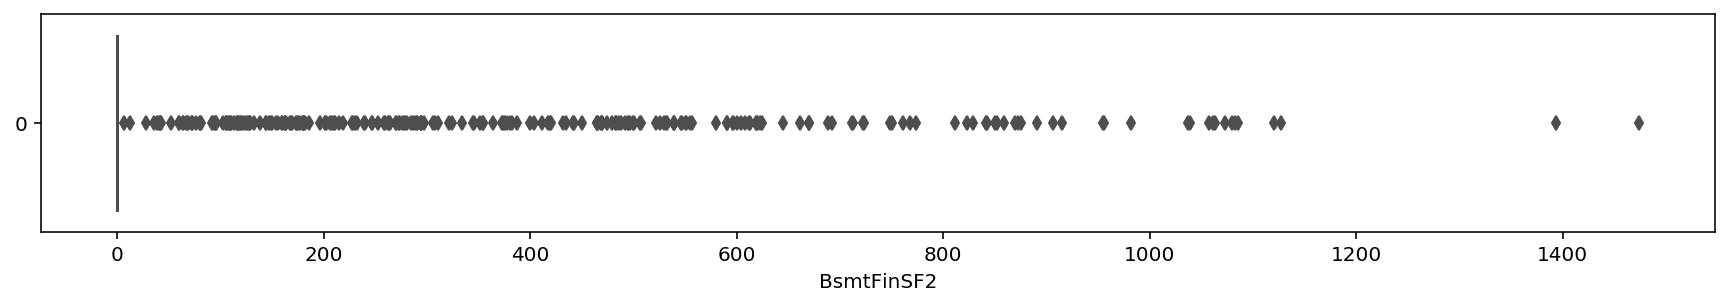

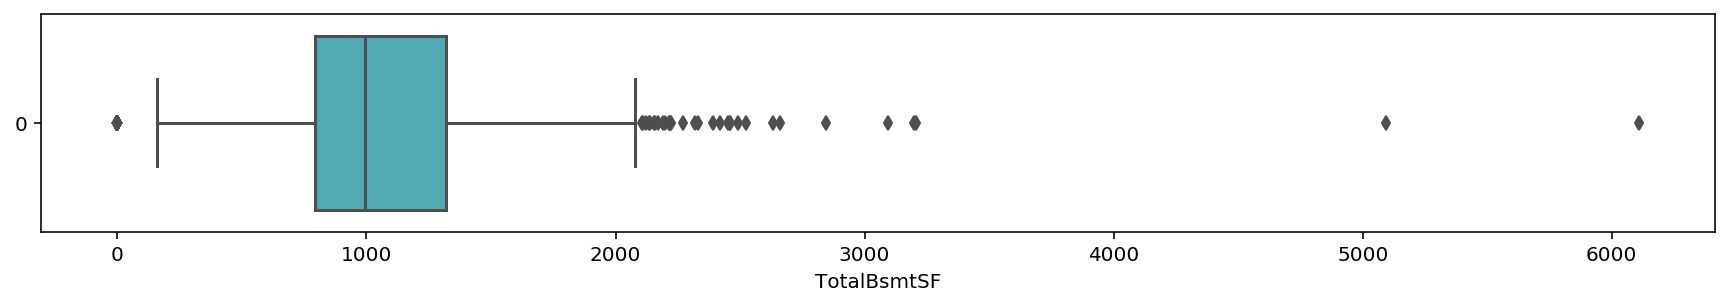

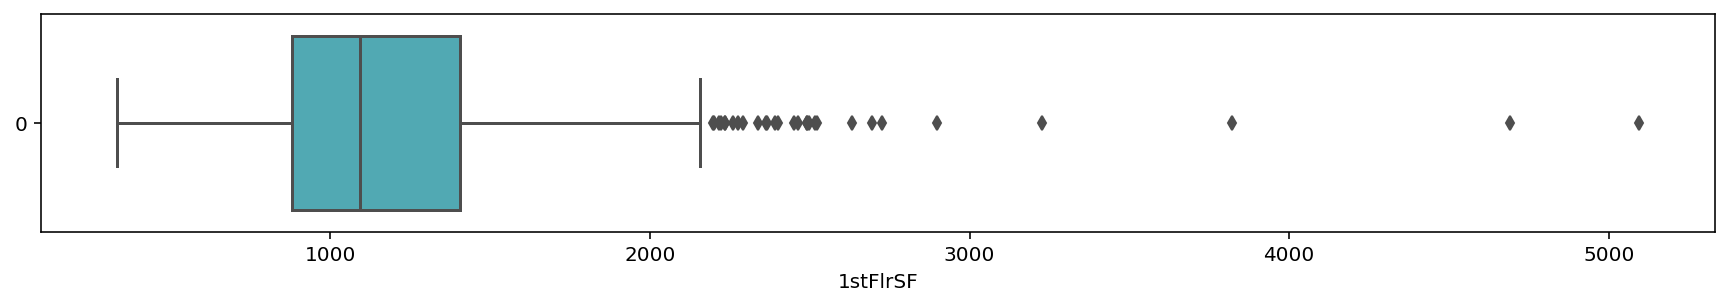

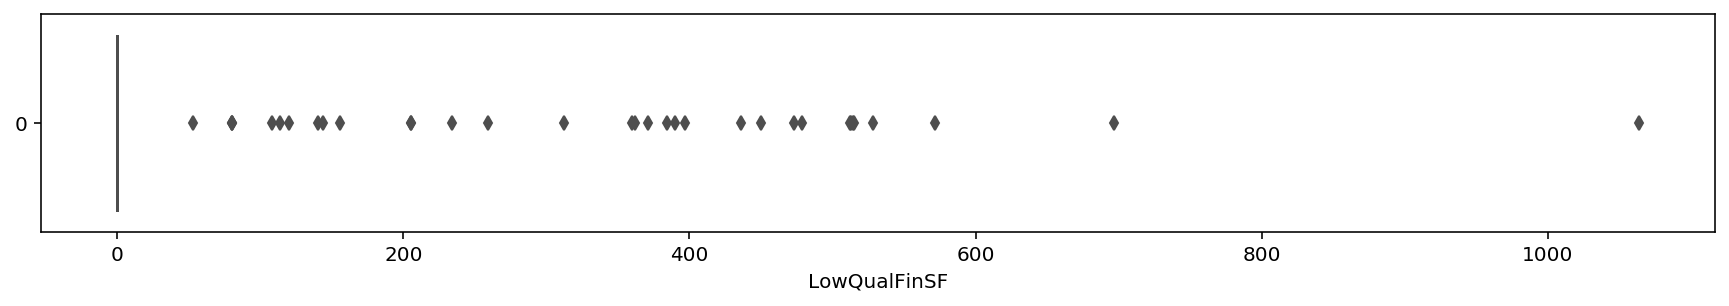

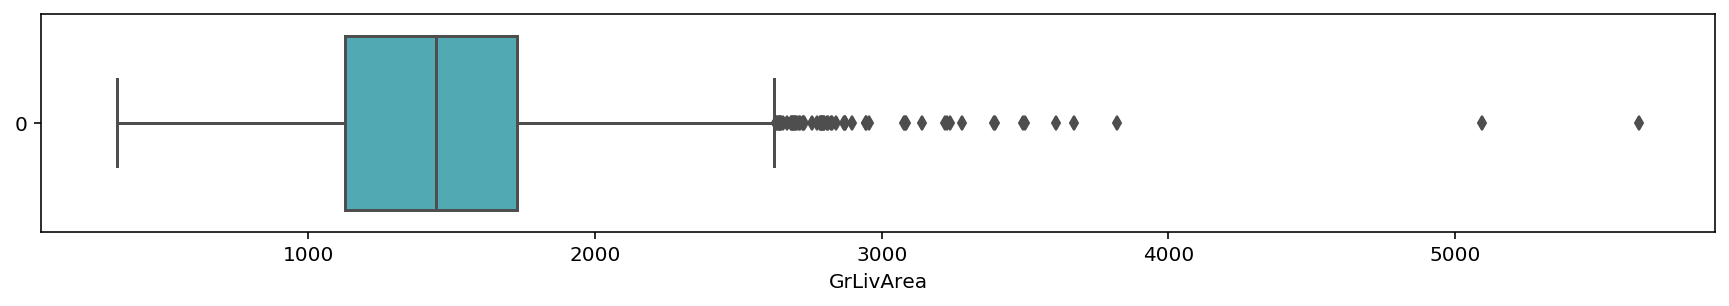

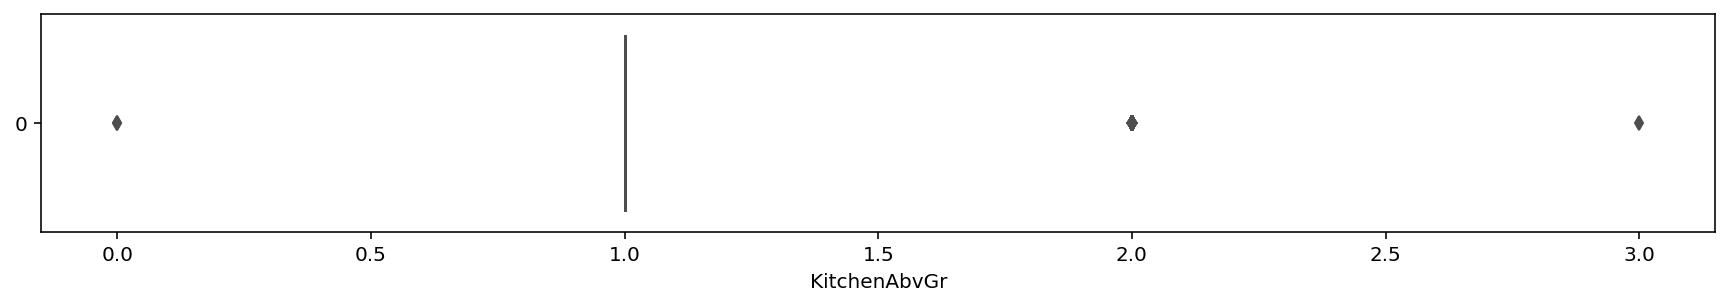

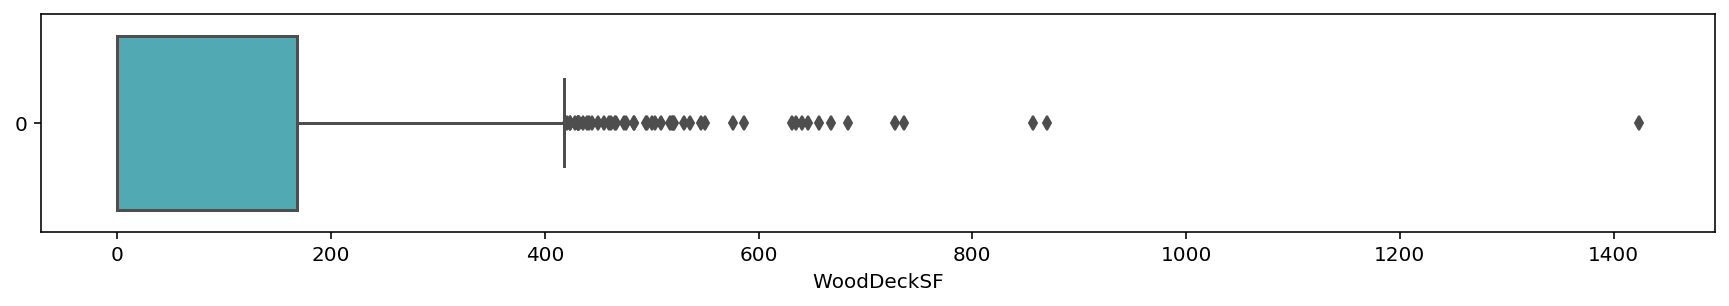

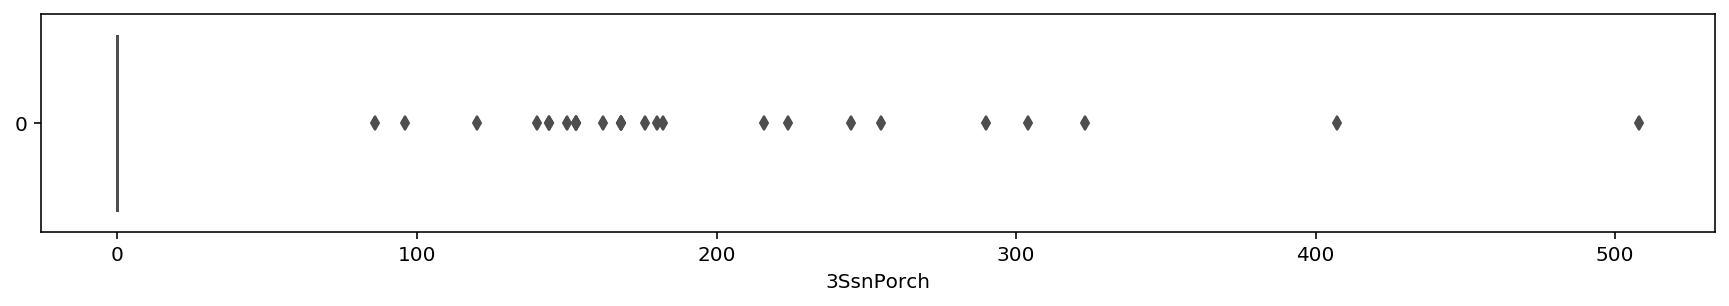

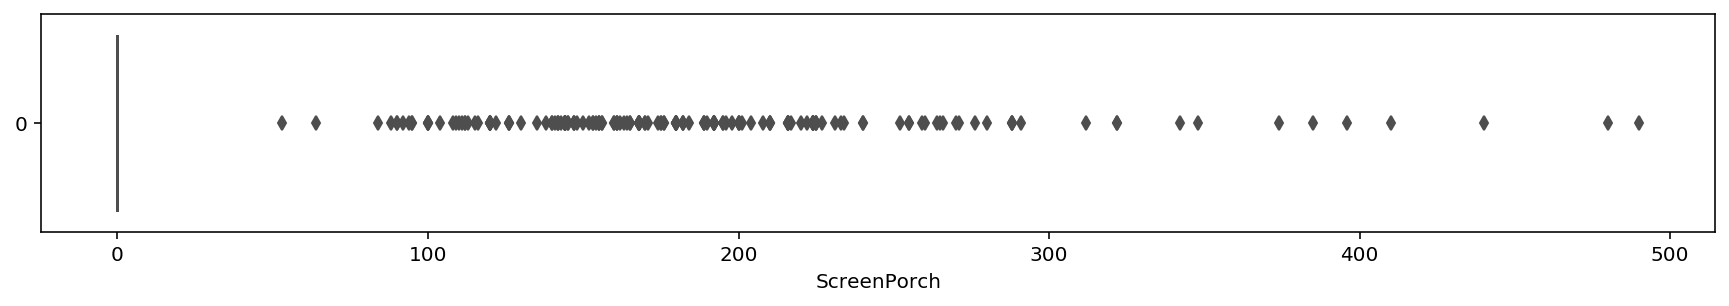

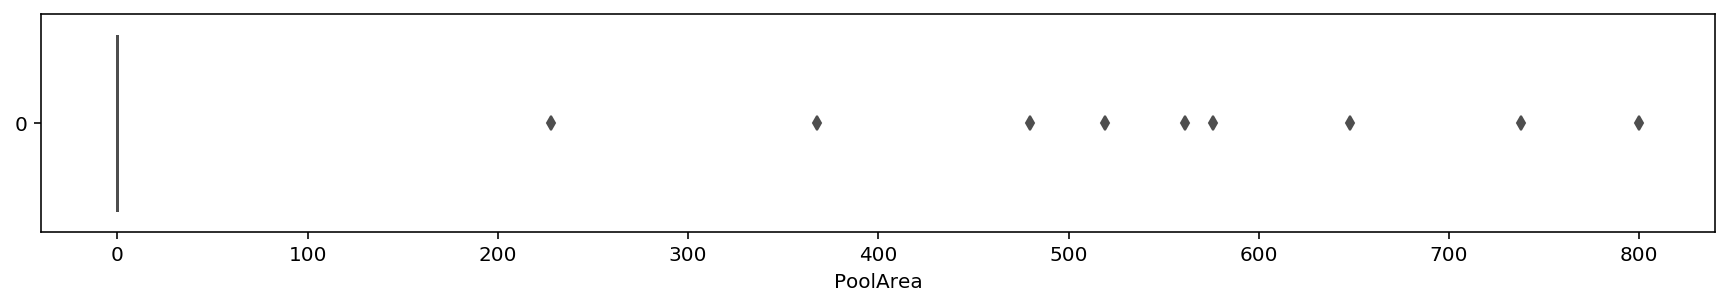

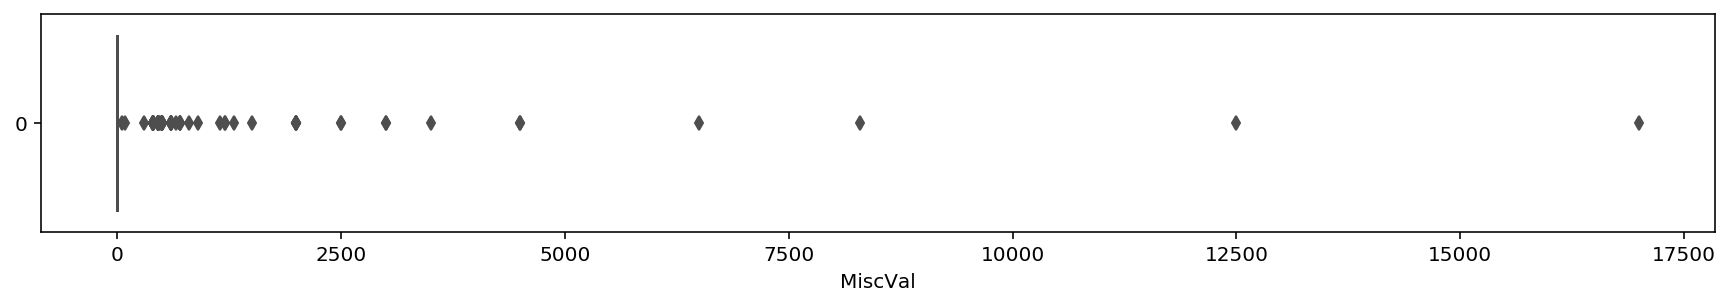

In [33]:
#Plot boxplots for the numeric variables
for col in cols_out:
    plt.figure(figsize=(15,2))
    plt.xlabel(col)
    sns.boxplot(data=ames_train[col], orient='h', palette='YlGnBu');

* All the variables have high numbers of outliers and all of them, with the exception of 'MiscVal' are related to the size of the houses (e.g. square feet, pool and masonry area). So, we do not know for sure that the data were wrongly keyed in since those homes might just be very large homes. 
* As for 'MiscVal', which is the dollar value of features that are not included in the data, it does make sense that some people could have very valuable miscellanous features, such as gold-plated bath tubs. 
* So we shall not remove the outliers. 

In [36]:
ames_train[ames_train['LotArea'] > 50000]['SalePrice'].sort_values(ascending=False)

1964    591587
823     538000
1571    385000
694     302000
1854    280000
471     277000
1052    256000
1726    250764
1843    240000
960     160000
745     160000
Name: SalePrice, dtype: int64

In [40]:
ames_train[ames_train['LotArea'] == 115149]['SalePrice']

694    302000
Name: SalePrice, dtype: int64

In [39]:
ames_train[ames_train['LotArea'] == 159000]['SalePrice']

471    277000
Name: SalePrice, dtype: int64

#### Discrete Values - Categorical or Continuous?

In [25]:
#14 discrete variables as described in Kaggle
discrete = ["YearBuilt", "YearRemod/Add", "BsmtFullBath", "BsmtHalfBath", 
            "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
            "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars",
            "MoSold", "YrSold"]

In [26]:
#Concatenate the discrete columns with 'SalePrice' 
#so that we can perform scatter plot later
disc_price = pd.concat([ames_train['SalePrice'], ames_train[discrete]], axis=1)

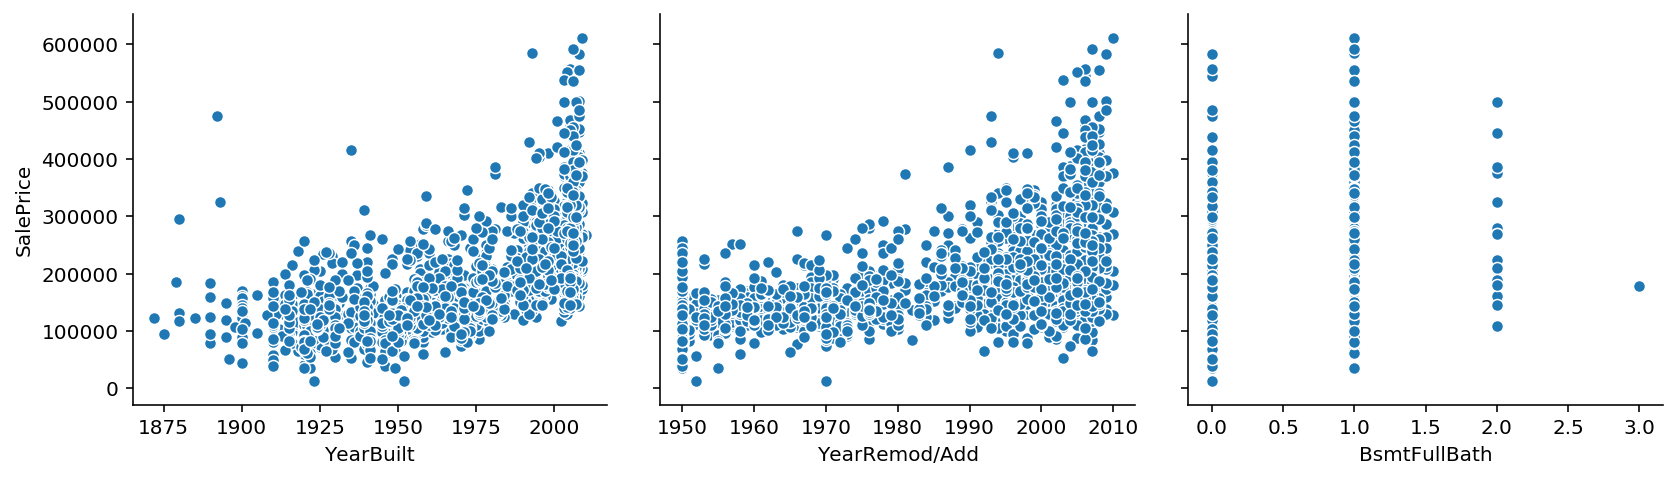

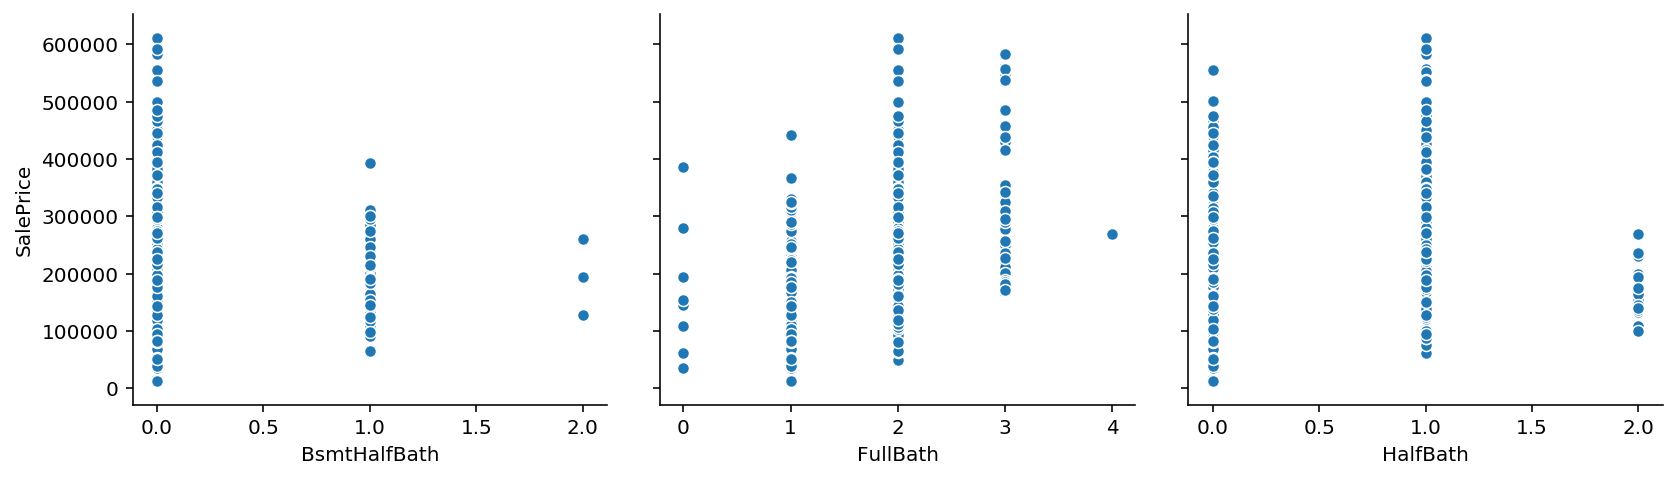

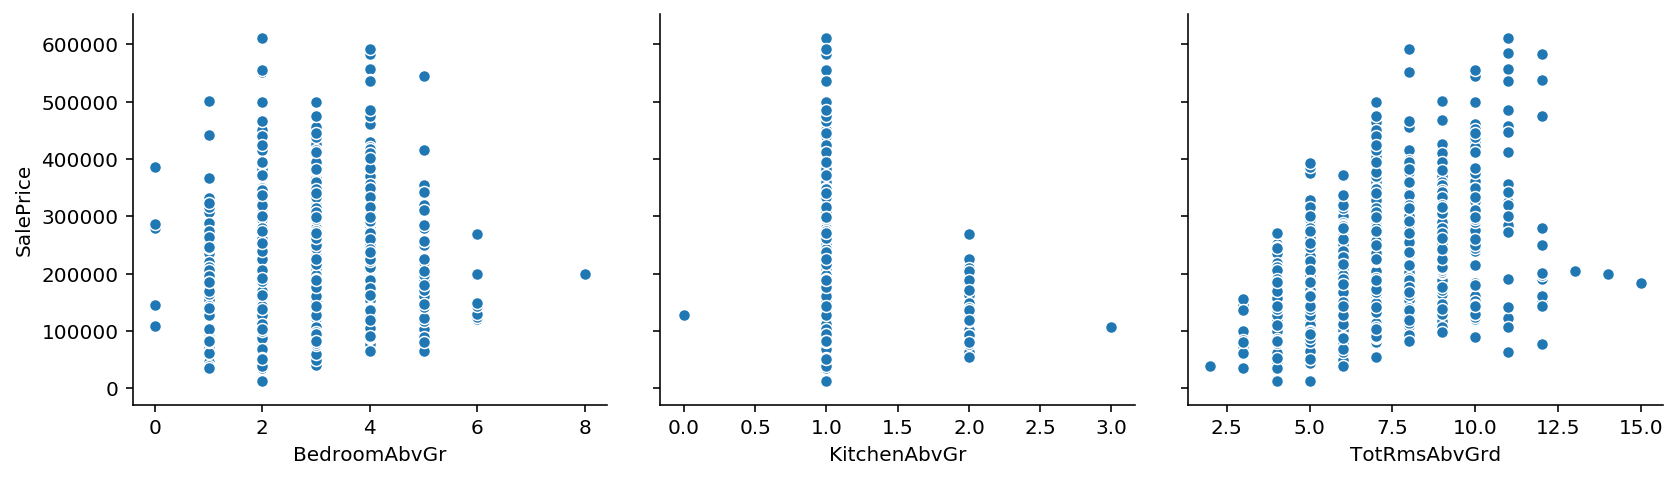

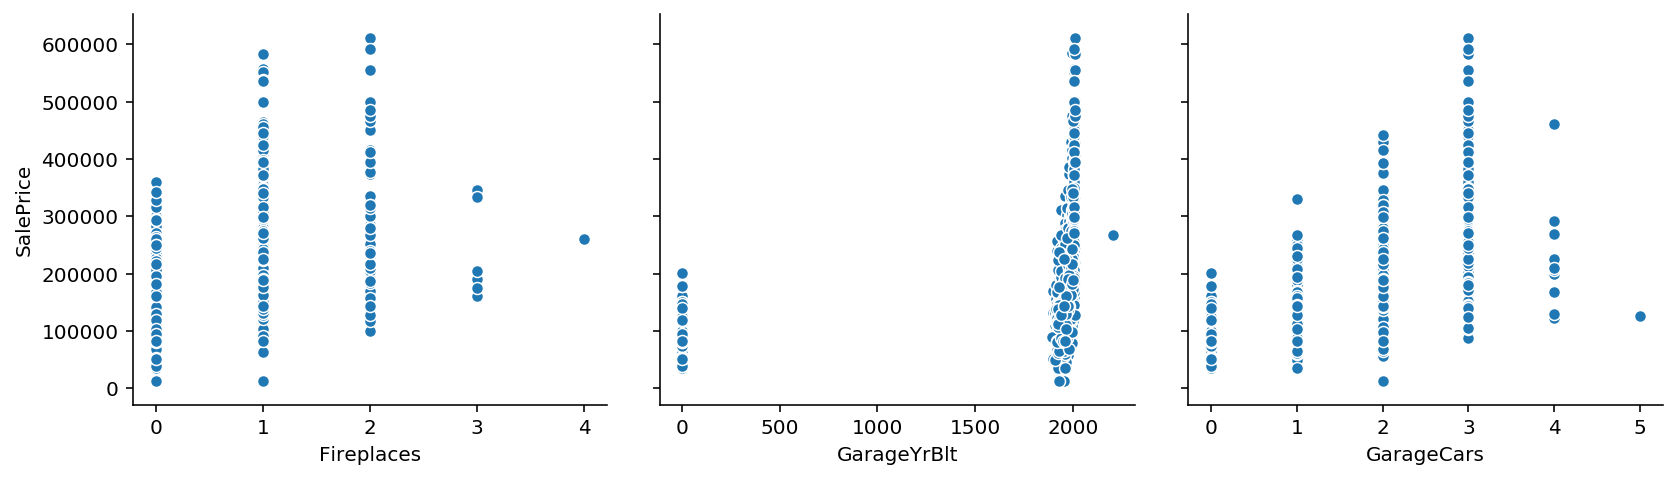

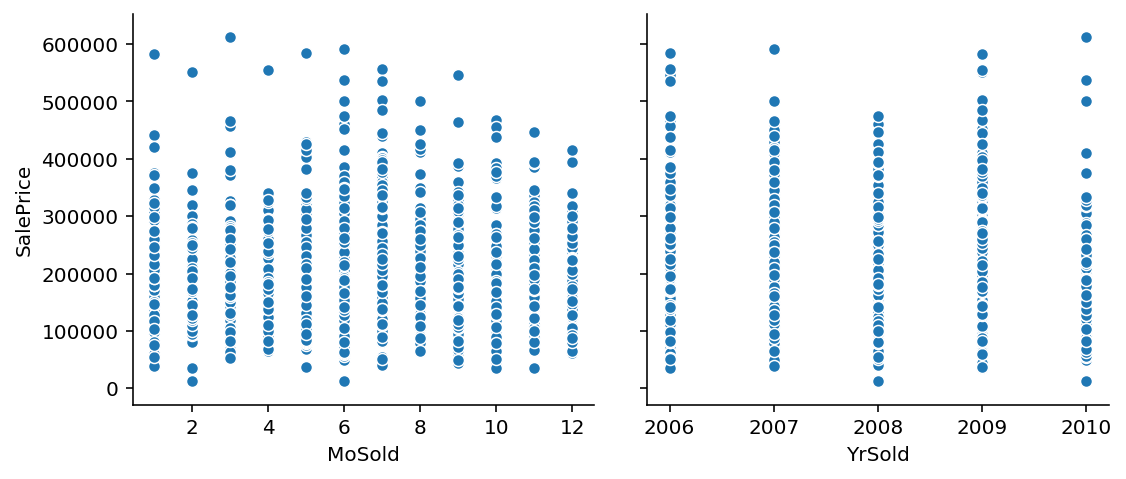

In [27]:
#Function to return chunks of list of size n
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

#Plot the scatter plot of discrete values against 'SalePrice'
for lst in chunks(discrete, 3):
    sns.pairplot(disc_price, y_vars=['SalePrice'], x_vars=lst, height=3.5, aspect=1.1);

The discrete values are all categorical variables except for Year Built and Year Remod/Add, which are continuous variables.
This makes sense because time should be continuous values. They do not have linear relationships with SalePrice but I will be feature-engineering both variables later, so I will leave them as they are for now. 

The variables that seem to have a linear relationship with 'SalePrice' are Total Rooms Above Ground, Garage Cars, Full Bath and Fireplaces.

We cannot tell whether Garage Year Built has a linear relationship with 'SalePrice' because there are two extreme clusters.

In [28]:
#Extract 'GarageYrBlt' for homes with garage
gar = ames_train[ames_train['GarageYrBlt'] > 0]['GarageYrBlt']

#Extract 'SalePrice' for homes with garage
sale = ames_train[ames_train['GarageYrBlt'] > 0]['SalePrice']

#Concatenate with 'SalePrice' and put into dataframe
gar_sale = pd.concat([gar, sale], axis=1)

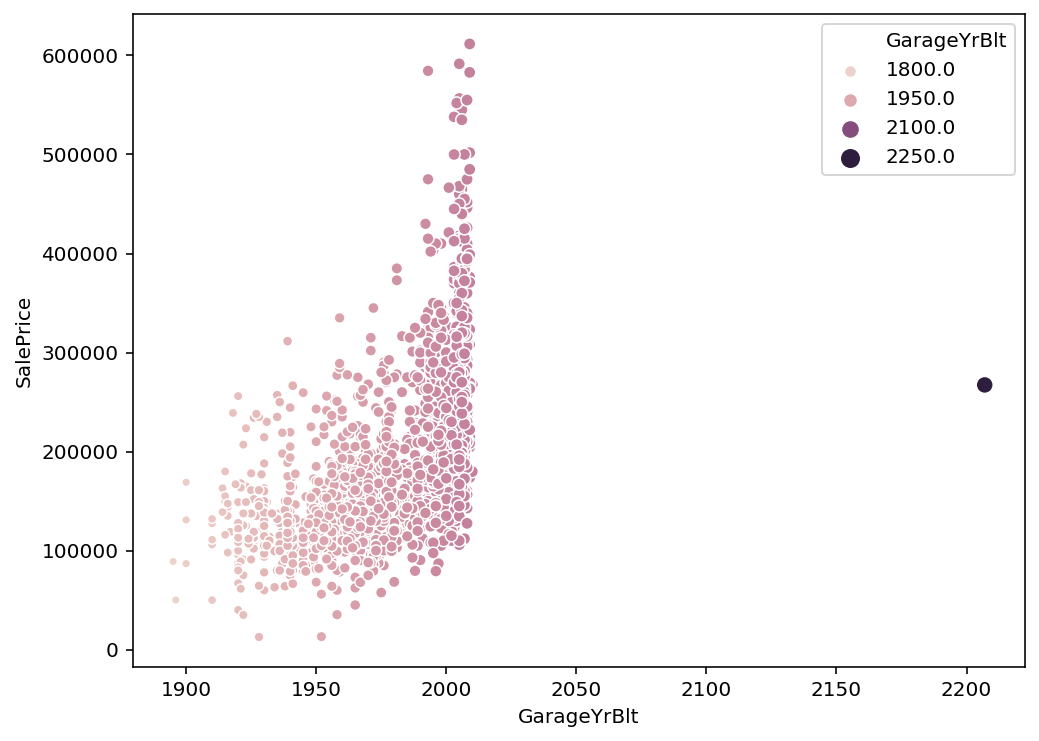

In [29]:
#Scatter plot for 'GarageYrBlt' with 'SalePrice'
plt.figure(figsize=(8,6))
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data = gar_sale, hue='GarageYrBlt', size='GarageYrBlt');

There seems to be a linear relationship between the year the garage is built and the sale price. This could be due to the fact that newer houses are valued higher than older ones assuming that garages are built at the same time as the homes themselves.

There is however, an outlier that should be removed because it is not possible for a garage to be have been built in the future.

In [30]:
#Remove outlier
ames_train = ames_train[ames_train['GarageYrBlt'] < 2200]

In [31]:
ames_train.shape

(2050, 81)

#### Combine Features

Combine features that belong to the same type of room/space e.g. porch, bedrooms, bathrooms, etc.
Do so for both the training and testing sets by concatenating. Features will also be dropped once they have been combined into a new feature.

In [32]:
#Getting the number of rows of train and test sets 
#so that we can split the concatenated dataset after feature-engineering
ntrain = ames_train.shape[0]
ntest = ames_test.shape[0]

In [33]:
#Concatenate the two data frames again so that we can get consistent combined features
#since we assume that both sets are drawn from the same distribution 
all_ames = pd.concat((ames_train, ames_test))
print('all_ames size is: {}'.format(all_ames.shape))

all_ames size is: (2929, 81)


In [34]:
#Look for columns related to porch
porch_cols = [col for col in ames_train.columns if 'Porch' in col]
porch_cols

['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [35]:
#Sum the square footage of the different types of porch
all_ames['PorchSF'] = (all_ames['OpenPorchSF'] + all_ames['EnclosedPorch'] + 
                         all_ames['3SsnPorch'] + all_ames['ScreenPorch'])

#Drop the different types of porch from dataframe to prevent multicollinearity
all_ames.drop(porch_cols, axis=1, inplace=True)

In [36]:
#Look for columns related to bath
bath_cols = [col for col in ames_train.columns if 'Bath' in col]
bath_cols

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [37]:
#Combine 'YearRemod/Add' and 'YrSold' into remodeling age
all_ames['RemodAge'] = all_ames['YrSold'] - all_ames['YearRemod/Add']

In [38]:
#Combine 'YearBuilt' and 'YrSold' into age of house
all_ames['Age'] = all_ames['YrSold'] - all_ames['YearBuilt']

#Drop 'YearBuilt' and 'YrSold' to prevent multicollinearity
all_ames.drop(['YrSold','YearBuilt','YearRemod/Add'], axis=1, inplace=True)

In [39]:
#Combine the full bath square footage
all_ames['TotalBath'] = all_ames['BsmtFullBath'] + all_ames['FullBath'] + 0.5 * (all_ames['BsmtHalfBath']
                                                                                 + all_ames['HalfBath']) 

#Drop the 'Bsmt FullBath' and 'BsmtHalfBath' columns from the dataframe to prevent multicollinearity
all_ames.drop(bath_cols, axis=1, inplace=True)

In [40]:
#Look for columns with 'SF' i.e. square feet in it
SF_cols = [col for col in ames_train.columns if 'SF' in col]
SF_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [41]:
#Combine all square footage except for 'LowQualFinSF' and 'WoodDeckSF' and basement values
#They do not relate to the square feet of the build up itself
#'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' are already included in 'TotalBsmtSF'
all_ames['TotalSF'] = all_ames['TotalBsmtSF'] + all_ames['1stFlrSF'] + all_ames['2ndFlrSF']

#Drop '1stFlrSF' and '2ndFlrSF' to prevent multicollinearity, keeping 'TotalBsmtSF' in case it is an important variable
all_ames.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [42]:
#Combine bedrooms and rooms into 'TotalRooms'
all_ames['TotalRooms'] = all_ames['BedroomAbvGr'] + all_ames['TotRmsAbvGrd']

#Drop feature-engineered variables
all_ames.drop(['BedroomAbvGr', 'TotRmsAbvGrd'], axis=1, inplace=True)

In [43]:
#Combine 'Condition1' and 'Condition2'. Both describe proximity to various conditions.
all_ames['Condition'] = all_ames['Condition1'] + all_ames['Condition2']

#Drop feature-engineered variables
all_ames.drop(['Condition1','Condition2'], axis=1, inplace=True)

In [44]:
print('Total features after feature-engineering: ', (all_ames.shape))

Total features after feature-engineering:  (2929, 71)


In [45]:
#Split the train and test sets before removing outliers from the train set
ames_train = all_ames[:ntrain]
ames_test = all_ames[ntrain:]

#Check that they have similar number of rows as previous sets
print('Shape of train dataset: ', ames_train.shape)
print('Shape of test dataset: ', ames_test.shape)

Shape of train dataset:  (2050, 71)
Shape of test dataset:  (879, 71)


## Exploratory Visualisations

#### Correlations

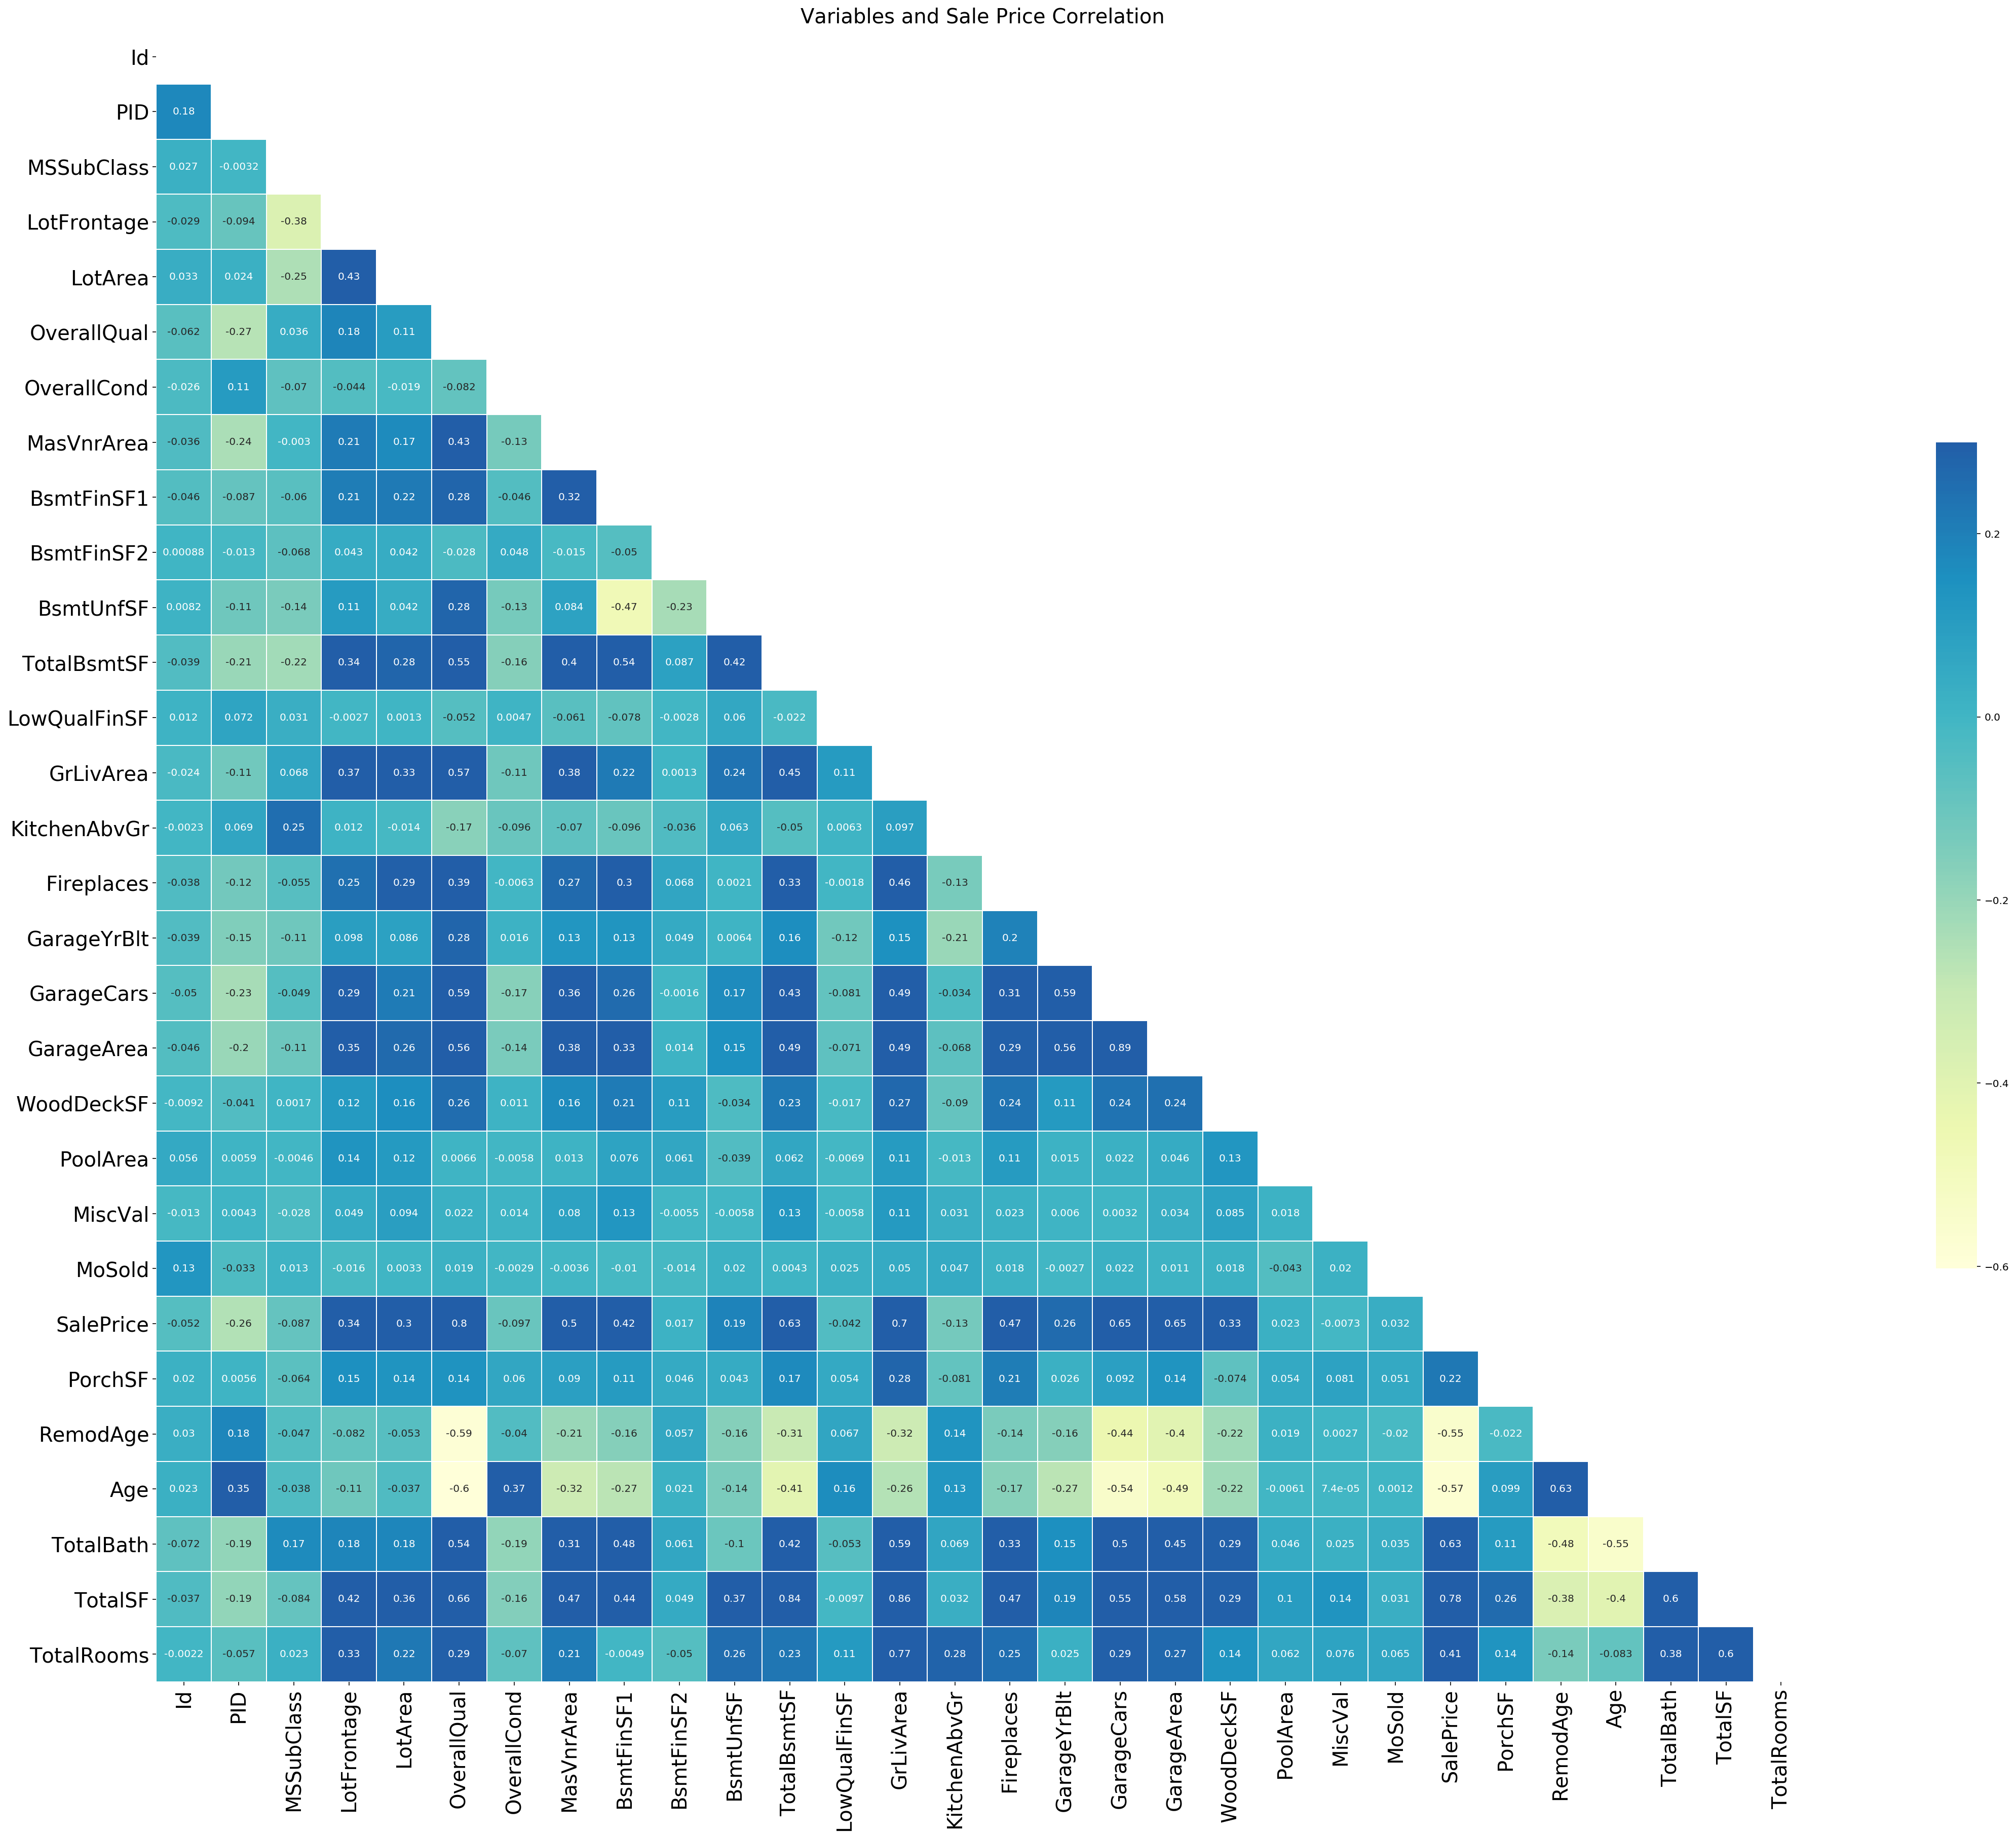

In [46]:
#Plot correlations on a heatmap
fig, ax = plt.subplots(figsize = (45,30))
plt.title('Variables and Sale Price Correlation', fontsize = 20)
train_corr = ames_train.corr()

#Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
ax = sns.heatmap(train_corr, mask=mask, cmap='YlGnBu', annot = True, ax=ax, cbar_kws={"shrink": .5},
                vmax=.3, center=0, square=True, linewidths=.5)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20);

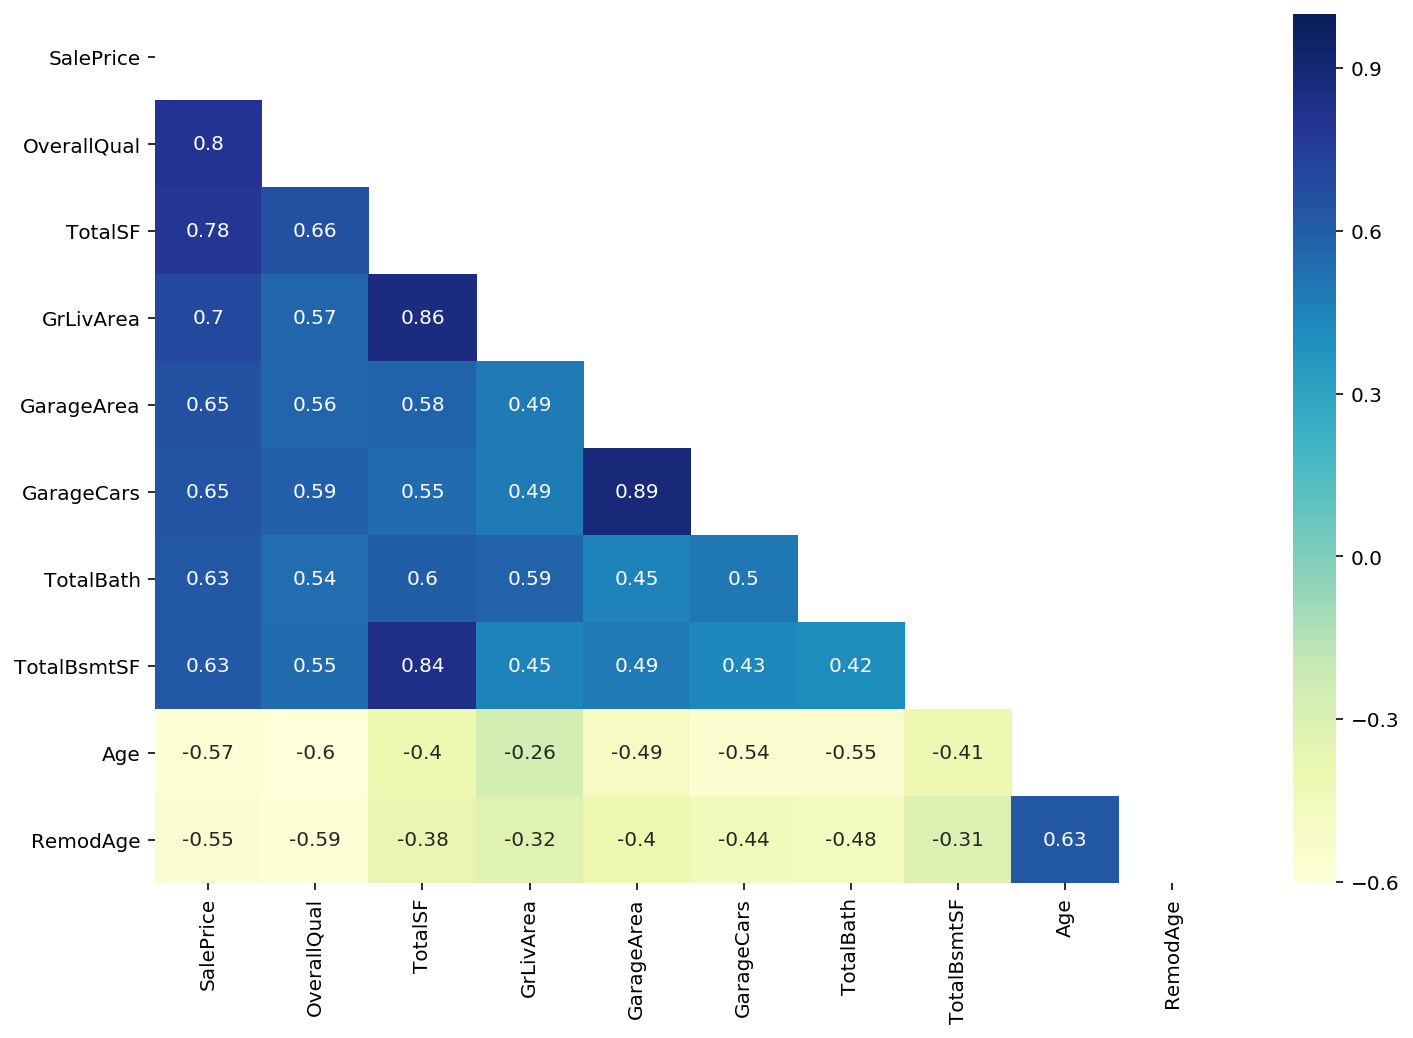

In [47]:
#Since we are more interested in the correlation between 'SalePrice' and the other variables
#it is simpler to zoom in on fewer variables that are more strongly correlated with 'SalePrice'

#Set the number of variables we want to zoom in on
k = 10 
corr = ames_train.corr()
corr_abs = corr.abs()

#Return the first k rows with the largest values in columns, in descending order, including 'SalePrice'
cols = corr_abs.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames_train[cols].values.T)

plt.figure(figsize = (12,8))

#Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cm, annot=True, cmap="YlGnBu", mask=mask,
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values);

We see that the features that are most highly correlated with SalePrice are overall quality and total square feet of the homes. Those with negative correlations are age and remodelling age, which makes sense because older homes generate less value. 

#### Distributions

In [48]:
#Continuous variables excluding 'SalePrice' as described in Kaggle
#include the combined features from above
continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
              'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'TotalSF', 'GrLivArea', 
              'GarageArea', 'PorchSF','WoodDeckSF', 'PoolArea', 'SalePrice']

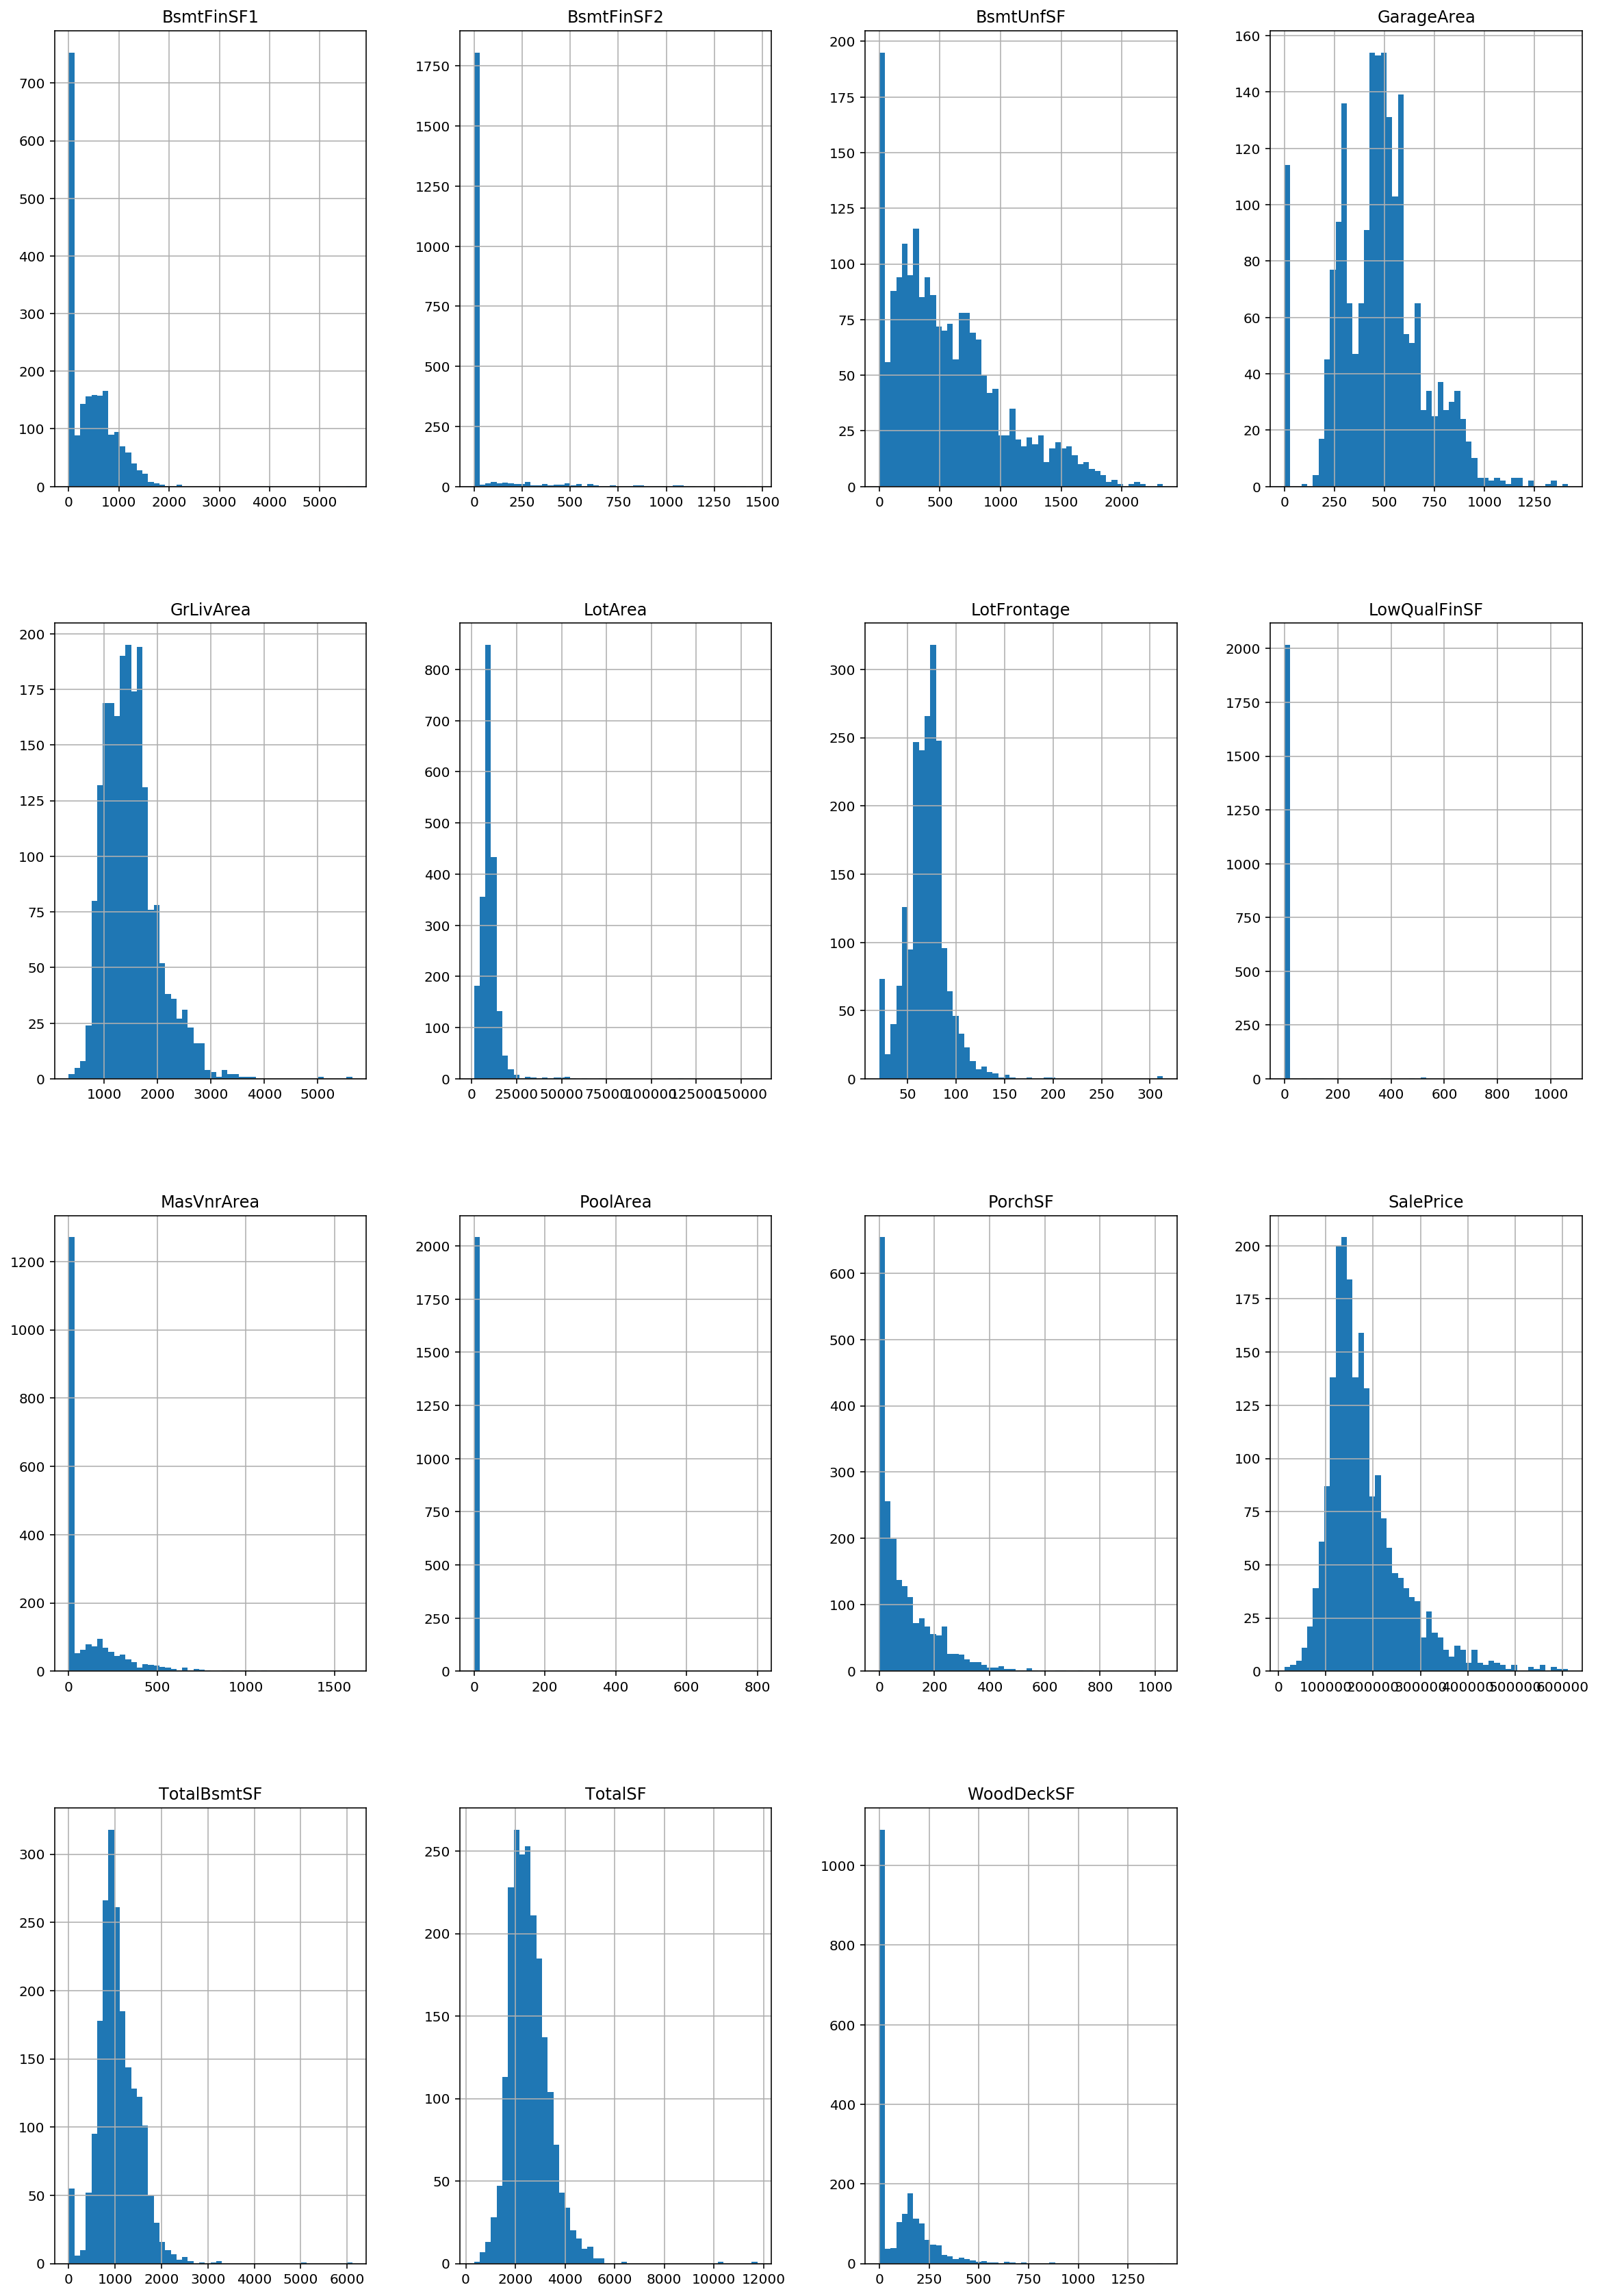

In [49]:
#Plot distributions for continuous variables
ames_train[continuous].hist(bins=50, figsize=(20,30));

Note the numerical features that have low/no variance. These will be of little to no contribution during the machine learning process.

We should drop 'BsmtFinSF1' and 'BsmtFinSF2' because of low variance and also to prevent multicollinearity since they are both already calculated in 'TotalBsmtSF'.
We could also drop 'LowQualFinSF', 'MiscVal' and 'PoolArea'.

The target variable, 'SalePrice' is positively skewed. The rest of the distributions also do not seem to follow a normal distribution, perhaps with the exception of 'TotalSF'. This can be addressed later if they pose a problem in linear regression analysis which requires all variables to be multivariate normal. 

In [50]:
#Getting the number of rows of train and test sets 
#so that we can split the concatenated dataset after dropping the features identified above
ntrain = ames_train.shape[0]
ntest = ames_test.shape[0]

In [51]:
#Concatenate the two data frames again so that we can get consistent features
all_ames = pd.concat((ames_train, ames_test))
print('all_ames size is: {}'.format(all_ames.shape))

all_ames size is: (2929, 71)


In [52]:
drop_col = ['BsmtFinSF1','BsmtFinSF2','LowQualFinSF','MiscVal', 'PoolArea']
all_ames.drop(drop_col, axis=1, inplace=True)

In [53]:
#Split the train and test sets before removing outliers from the train set
ames_train = all_ames[:ntrain]
ames_test = all_ames[ntrain:]

#Check that they have similar number of rows as previous sets
print('Shape of train dataset: ', ames_train.shape)
print('Shape of test dataset: ', ames_test.shape)

Shape of train dataset:  (2050, 66)
Shape of test dataset:  (879, 66)


#### Scatterplots and Boxplots

In [54]:
#New list of continuous variables excluding the recently dropped columns
#Added 'Age' and 'RemodAge', which are actually discrete variables, to see possible correlation against 'SalePrice'
new_continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'TotalSF', 'GrLivArea', 'GarageArea', 
                  'PorchSF','WoodDeckSF', 'Age', 'RemodAge']

#Concatenate continuous variables with 'SalePrice' to get dataframe for scatter plot
cont_price = pd.concat([ames_train[new_continuous], ames_train['SalePrice']], axis=1)

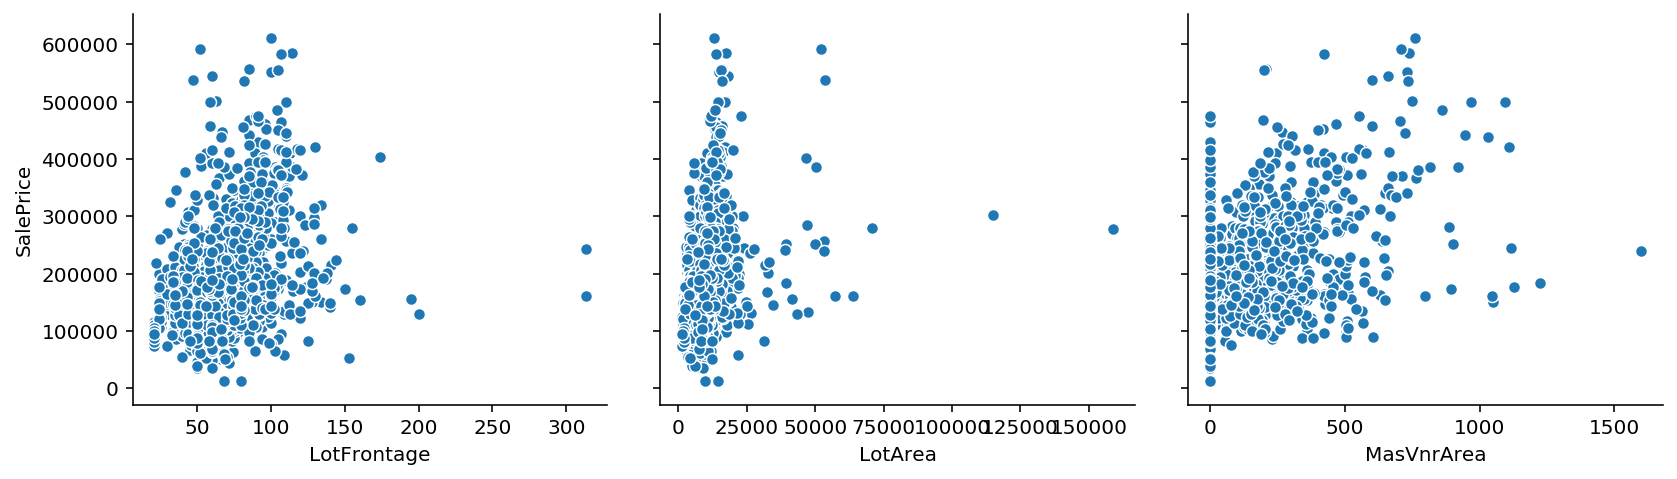

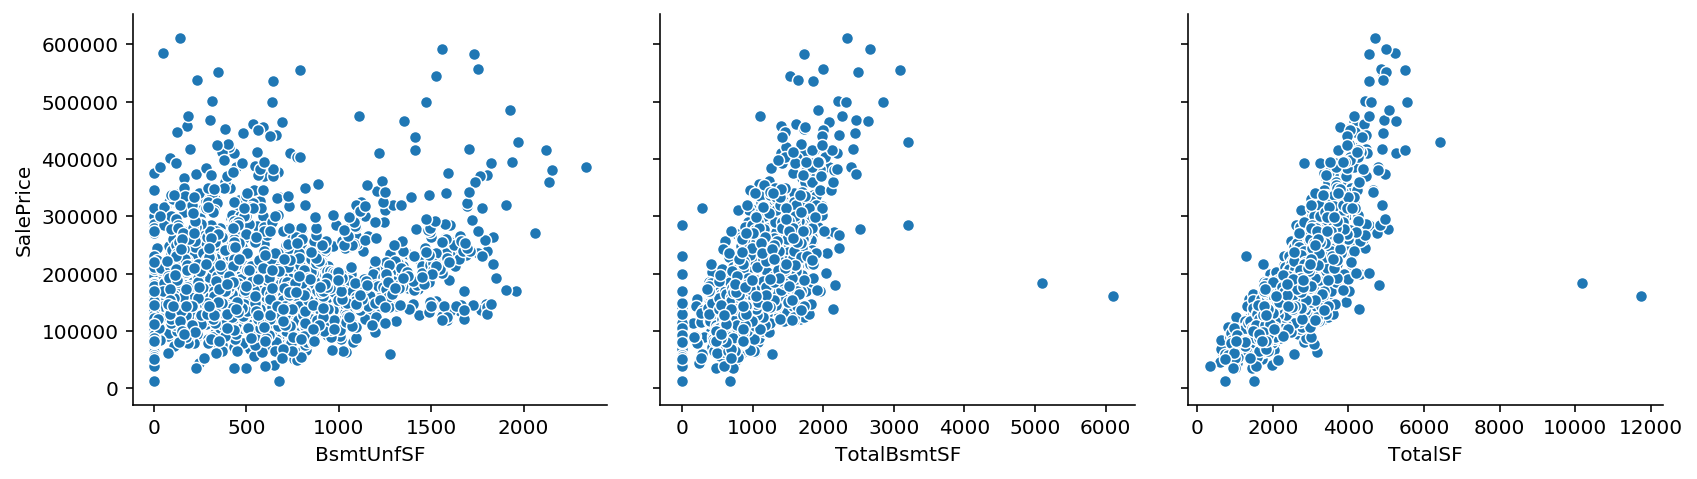

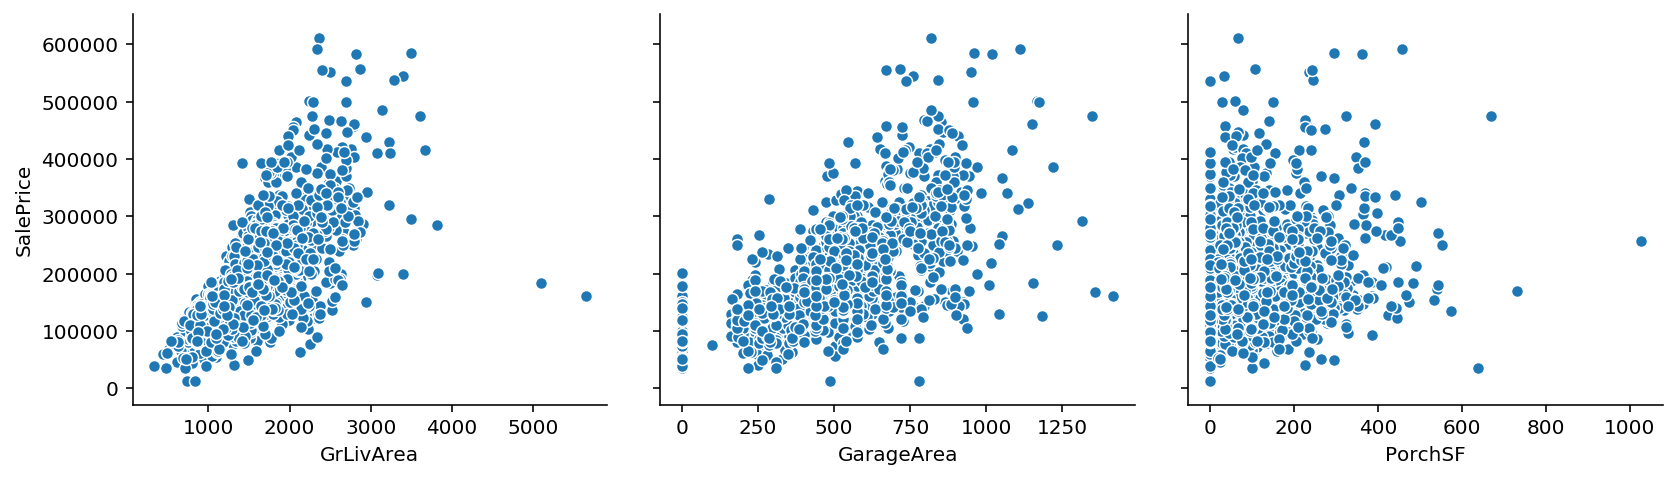

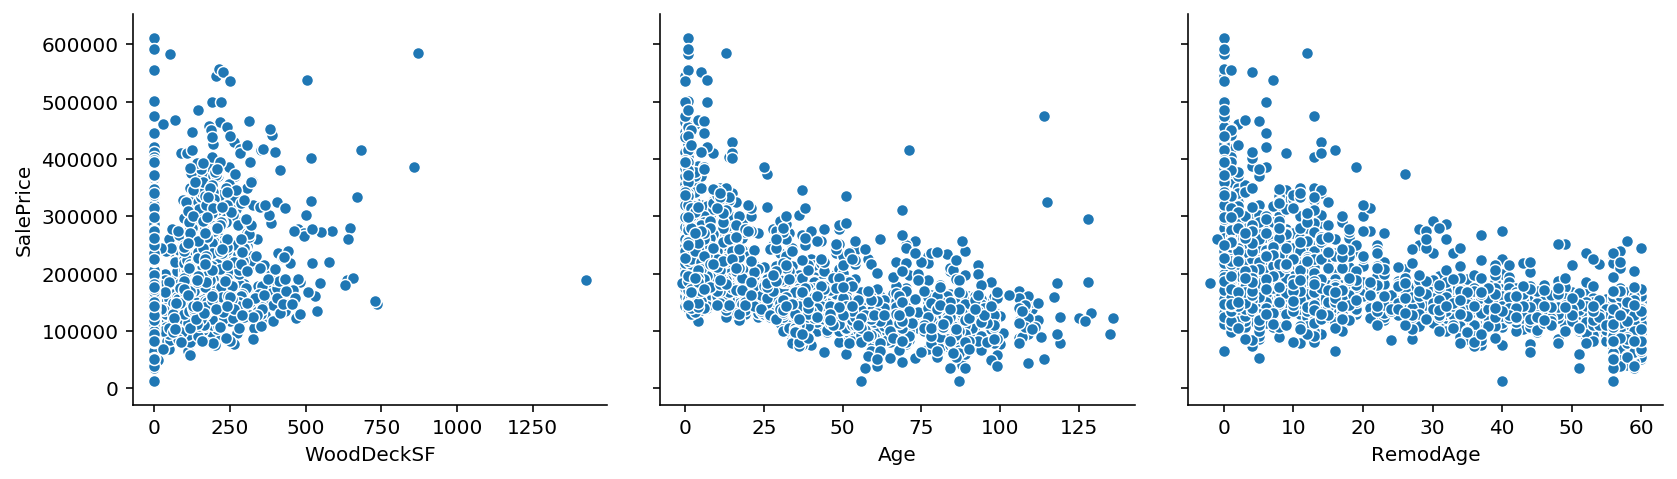

In [55]:
#Plot the scatter plot of continuous values against 'SalePrice'
for lst in chunks(new_continuous, 3):
    sns.pairplot(cont_price, y_vars=['SalePrice'], x_vars=lst, height=3.5, aspect=1.1);

We observe the following:

* Positive correlation: 'LotFrontage', 'LotArea', 'TotalBsmtSF', 'TotalSF', 'GrLivArea', 'GarageArea'
* Negative correlation: 'Age', 'RemodAge'

In [56]:
#Pick out the categorical values as described in Kaggle
categorical1 = ['SaleType', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'LandContour', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','MasVnrType', 
                'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature']

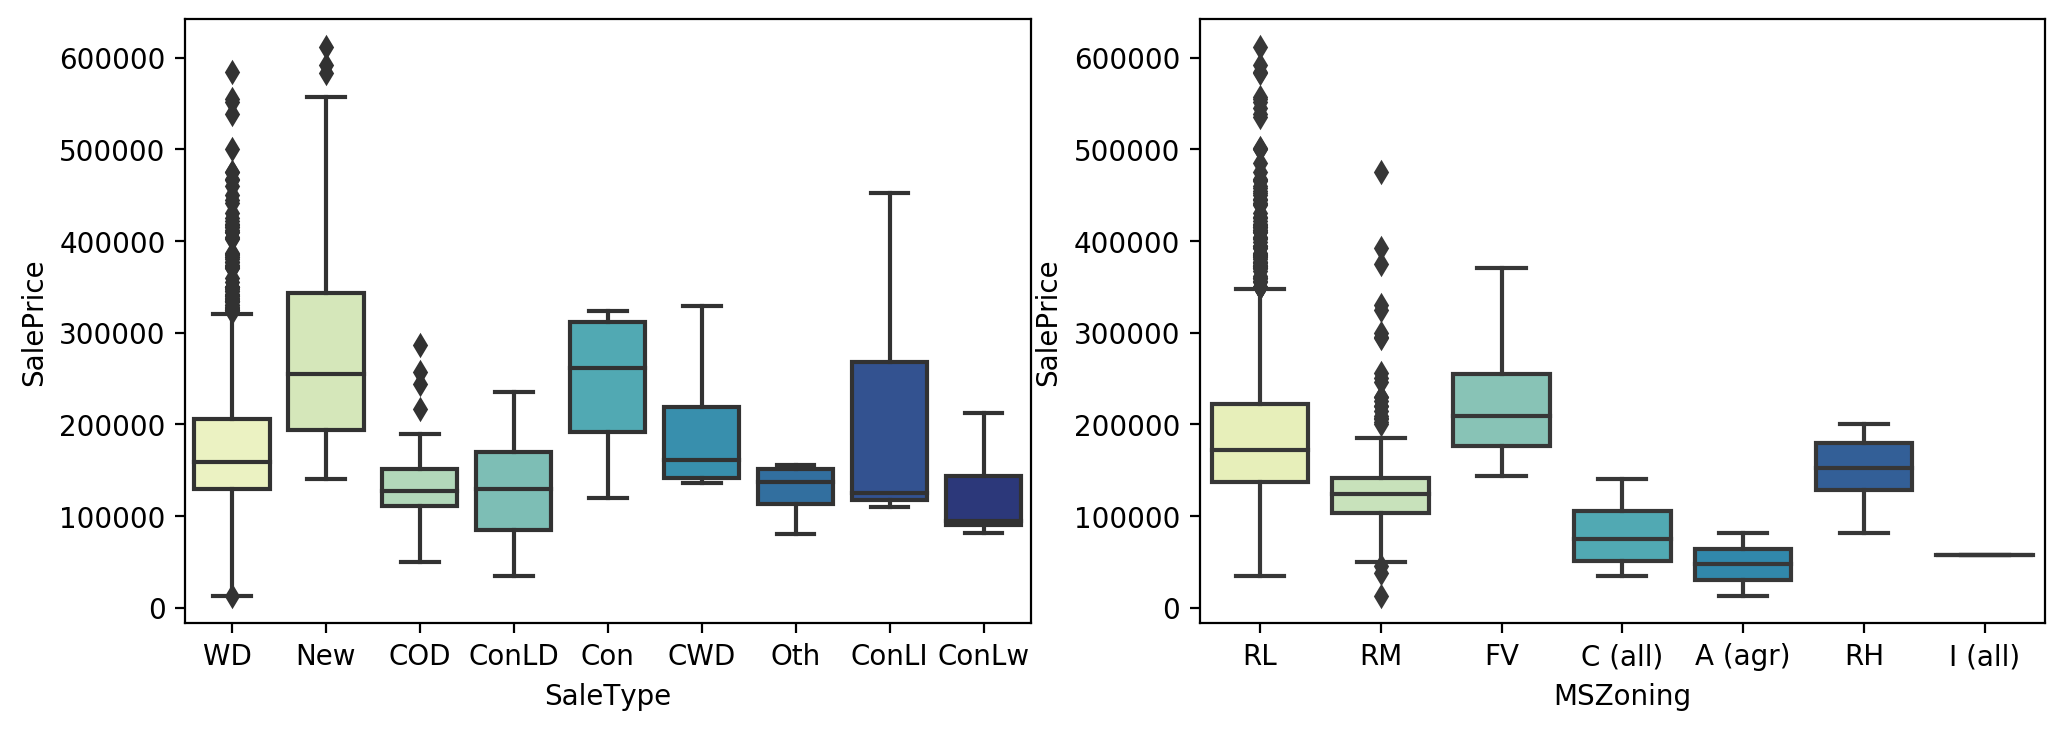

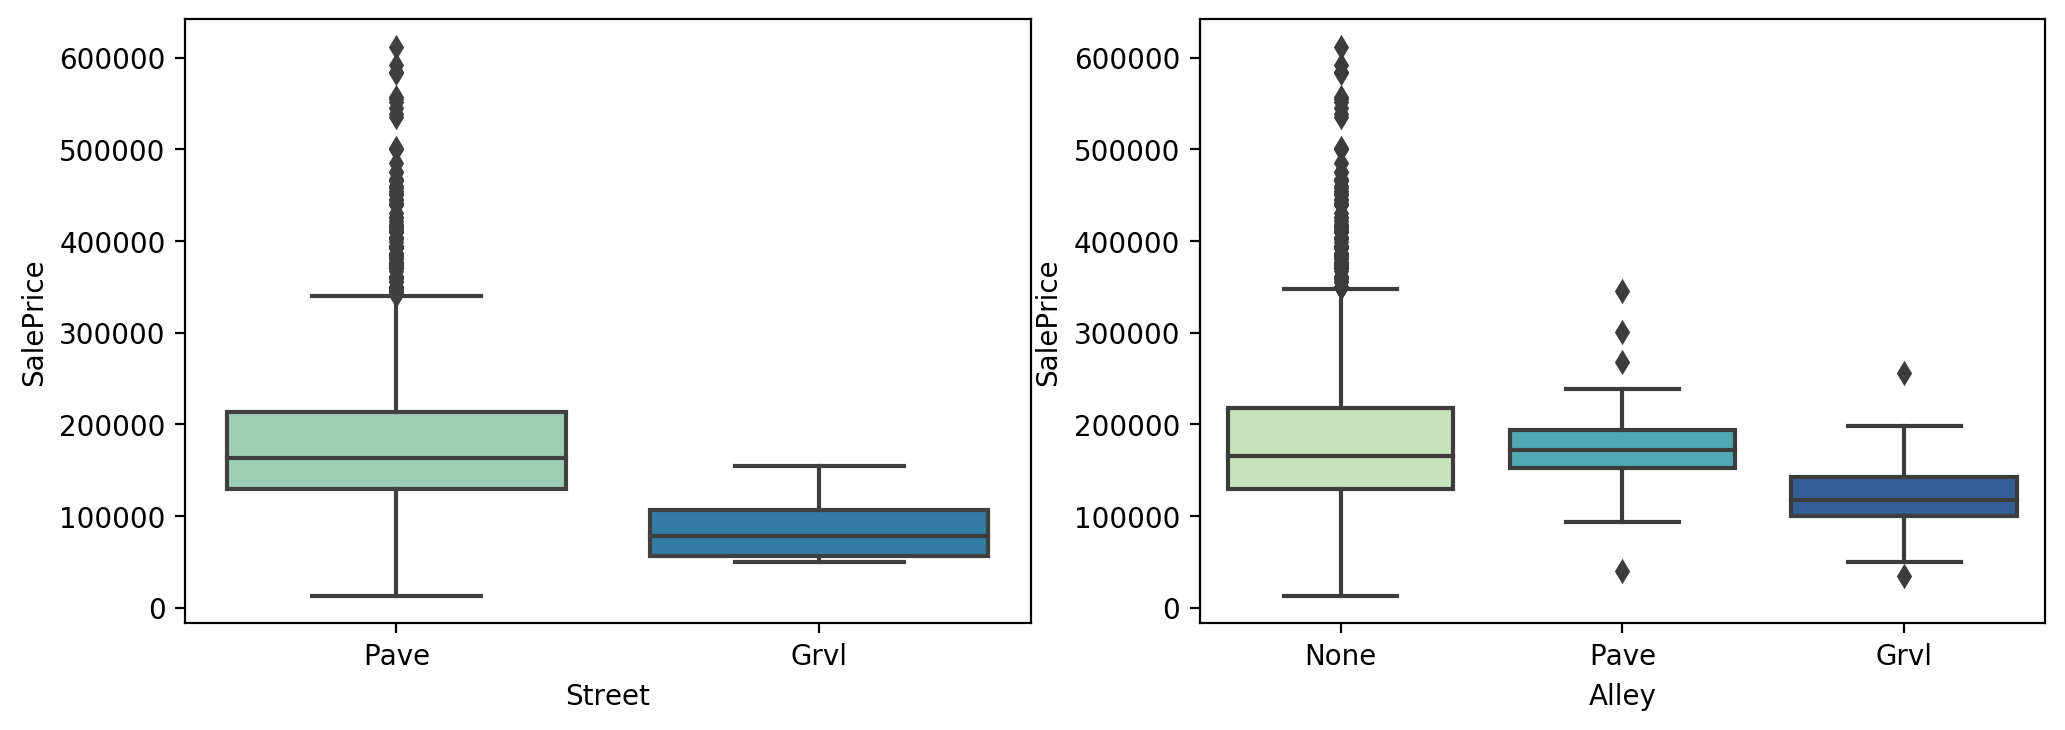

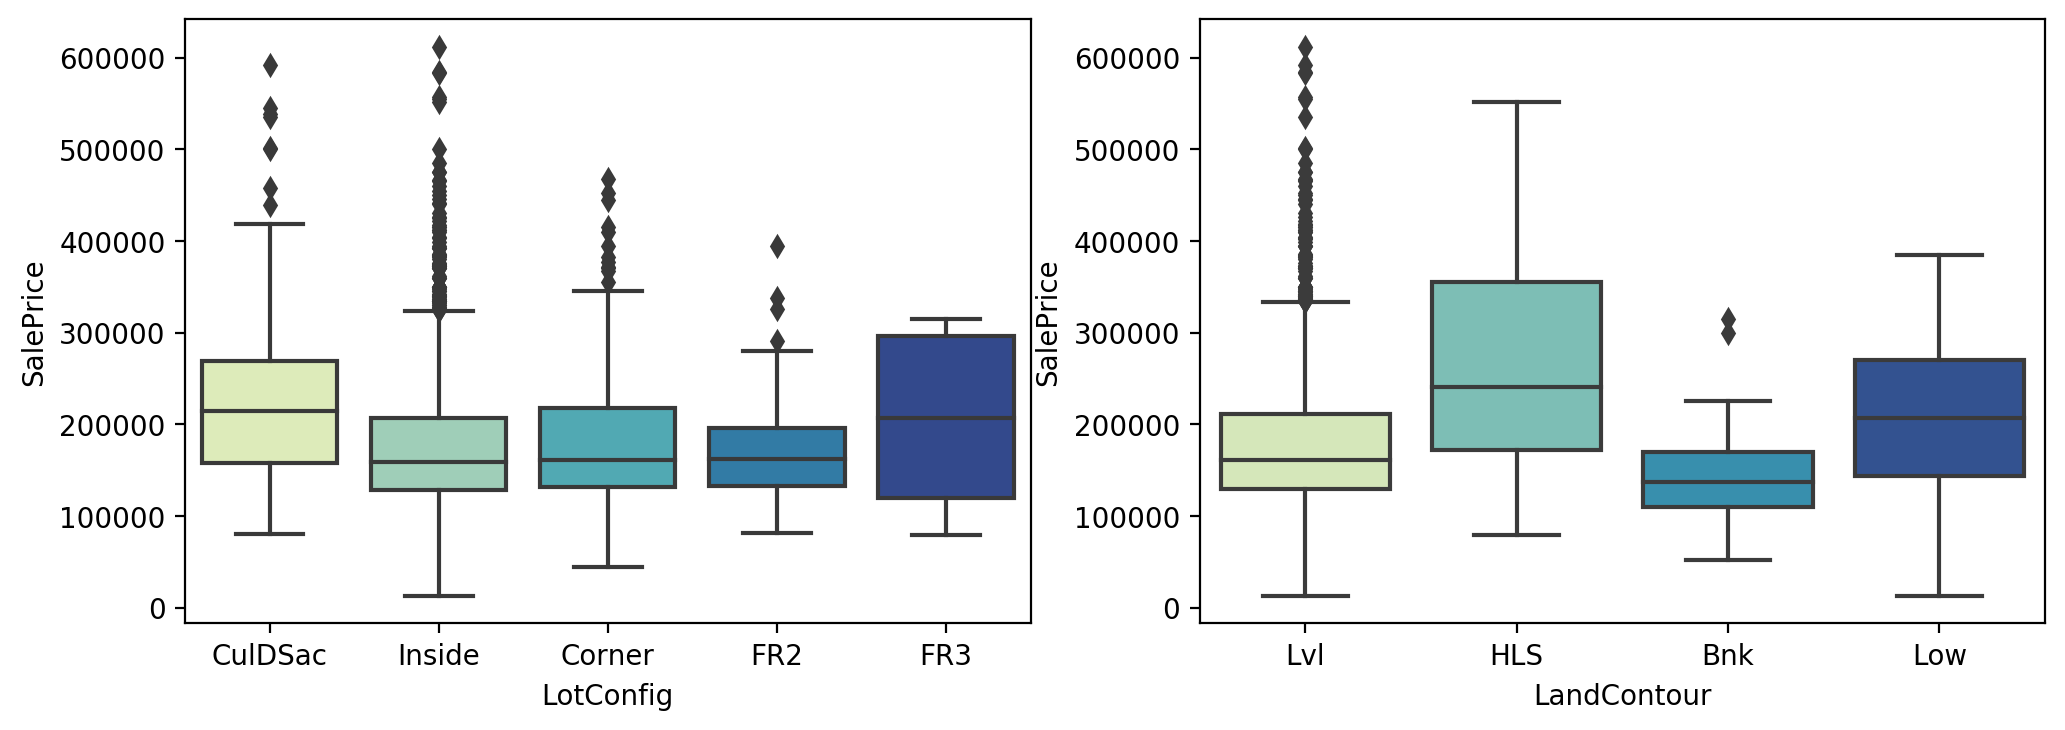

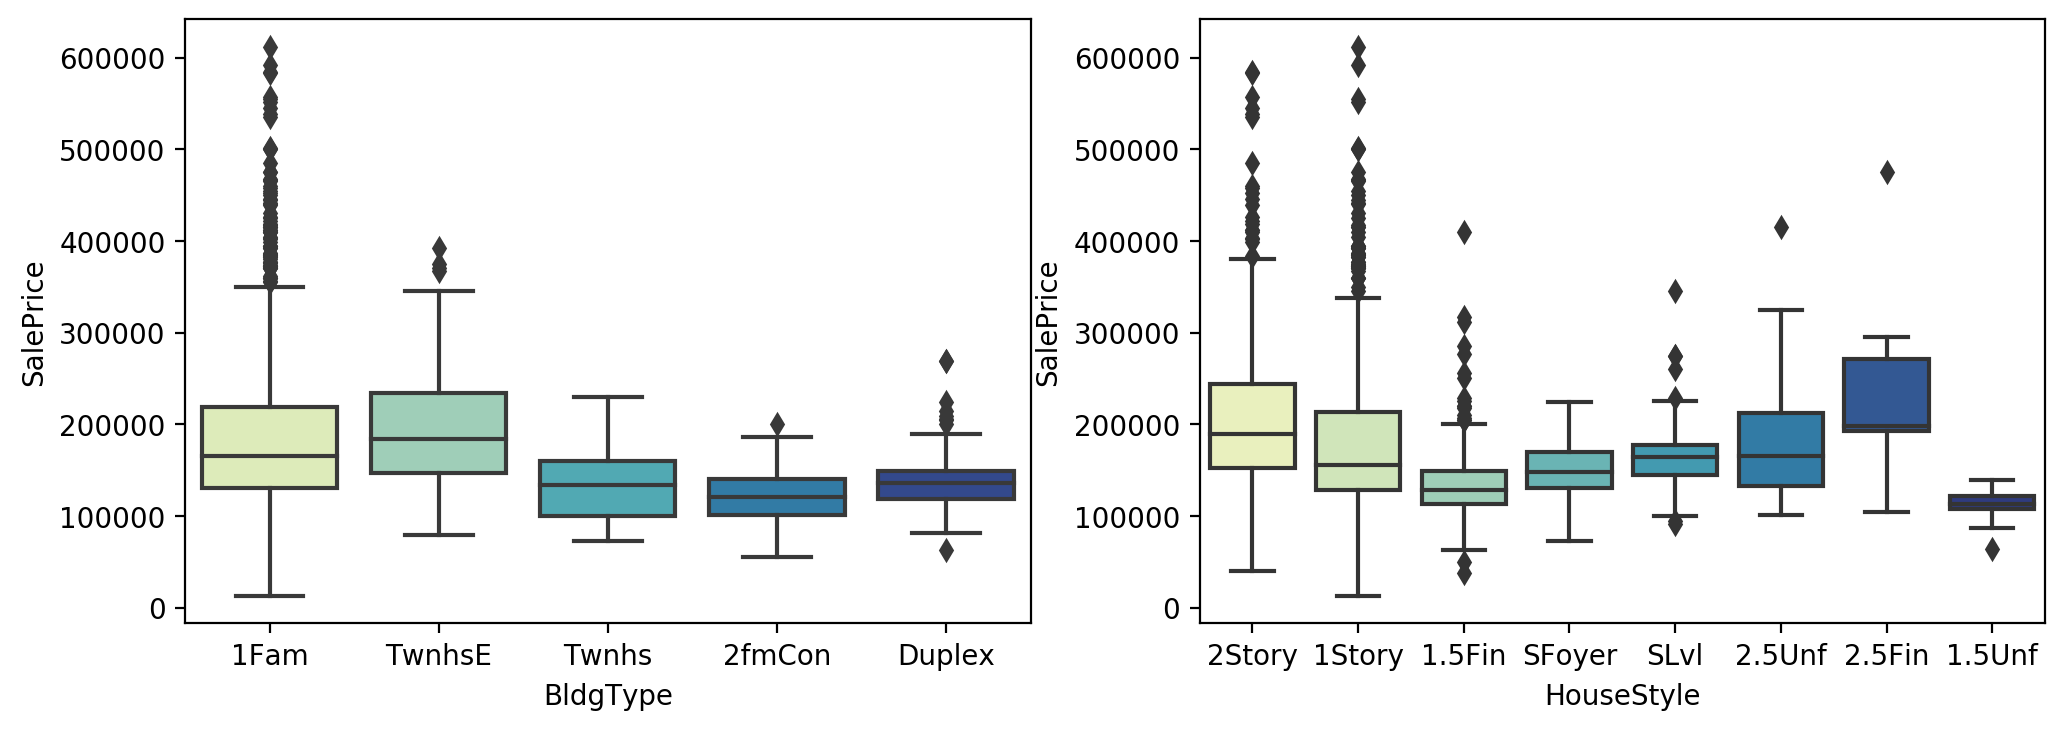

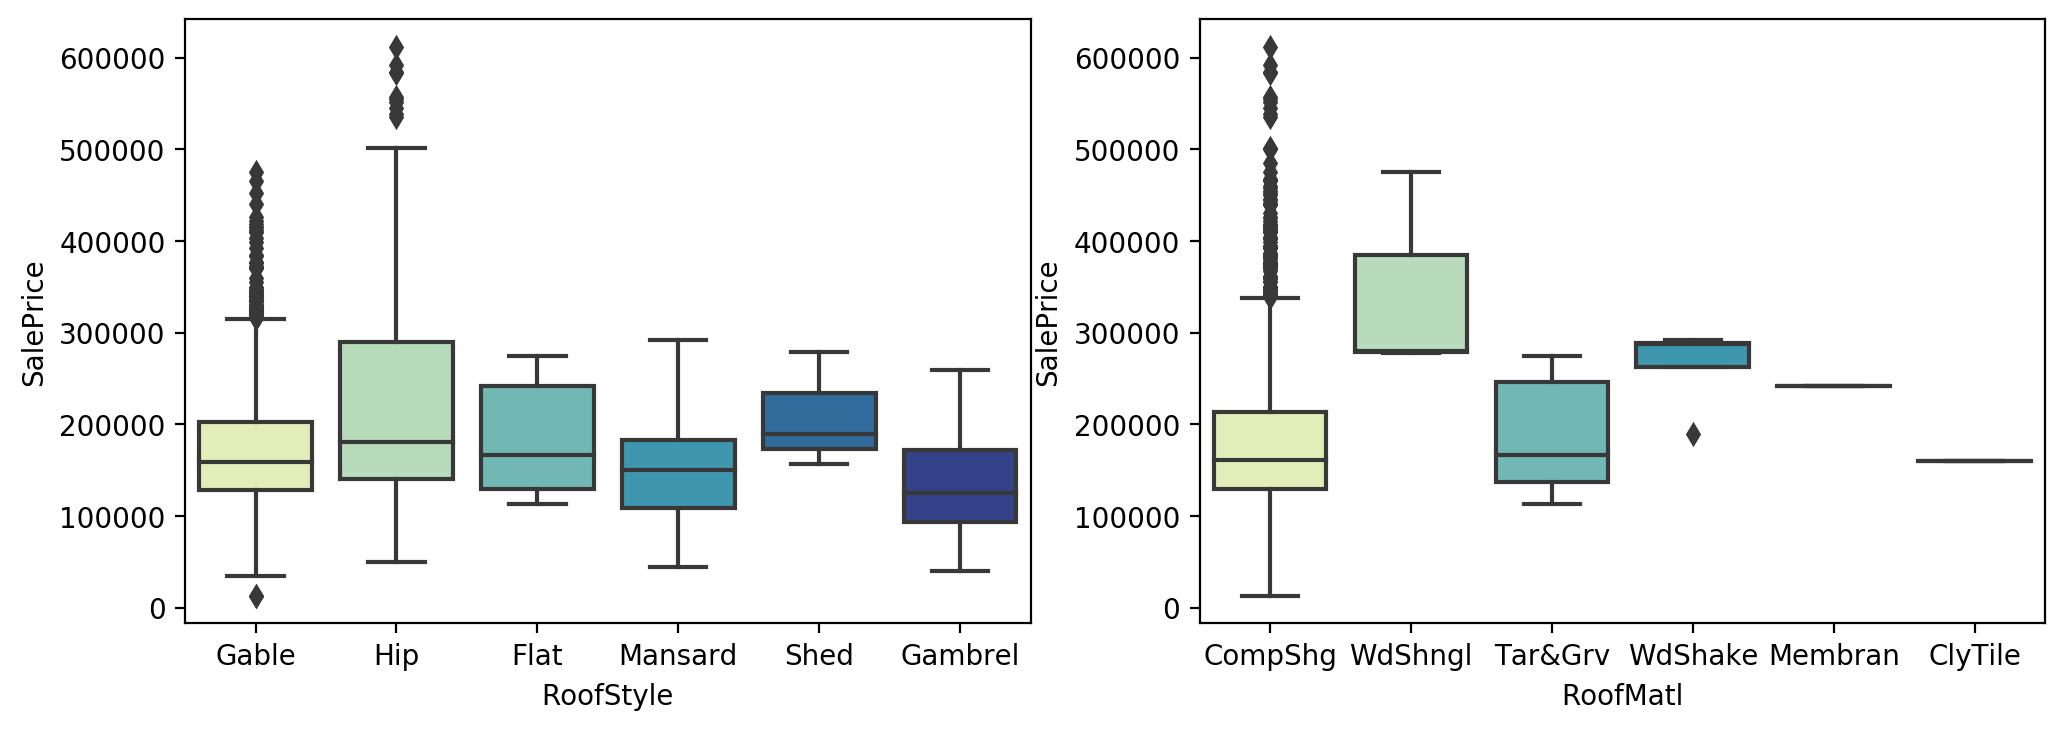

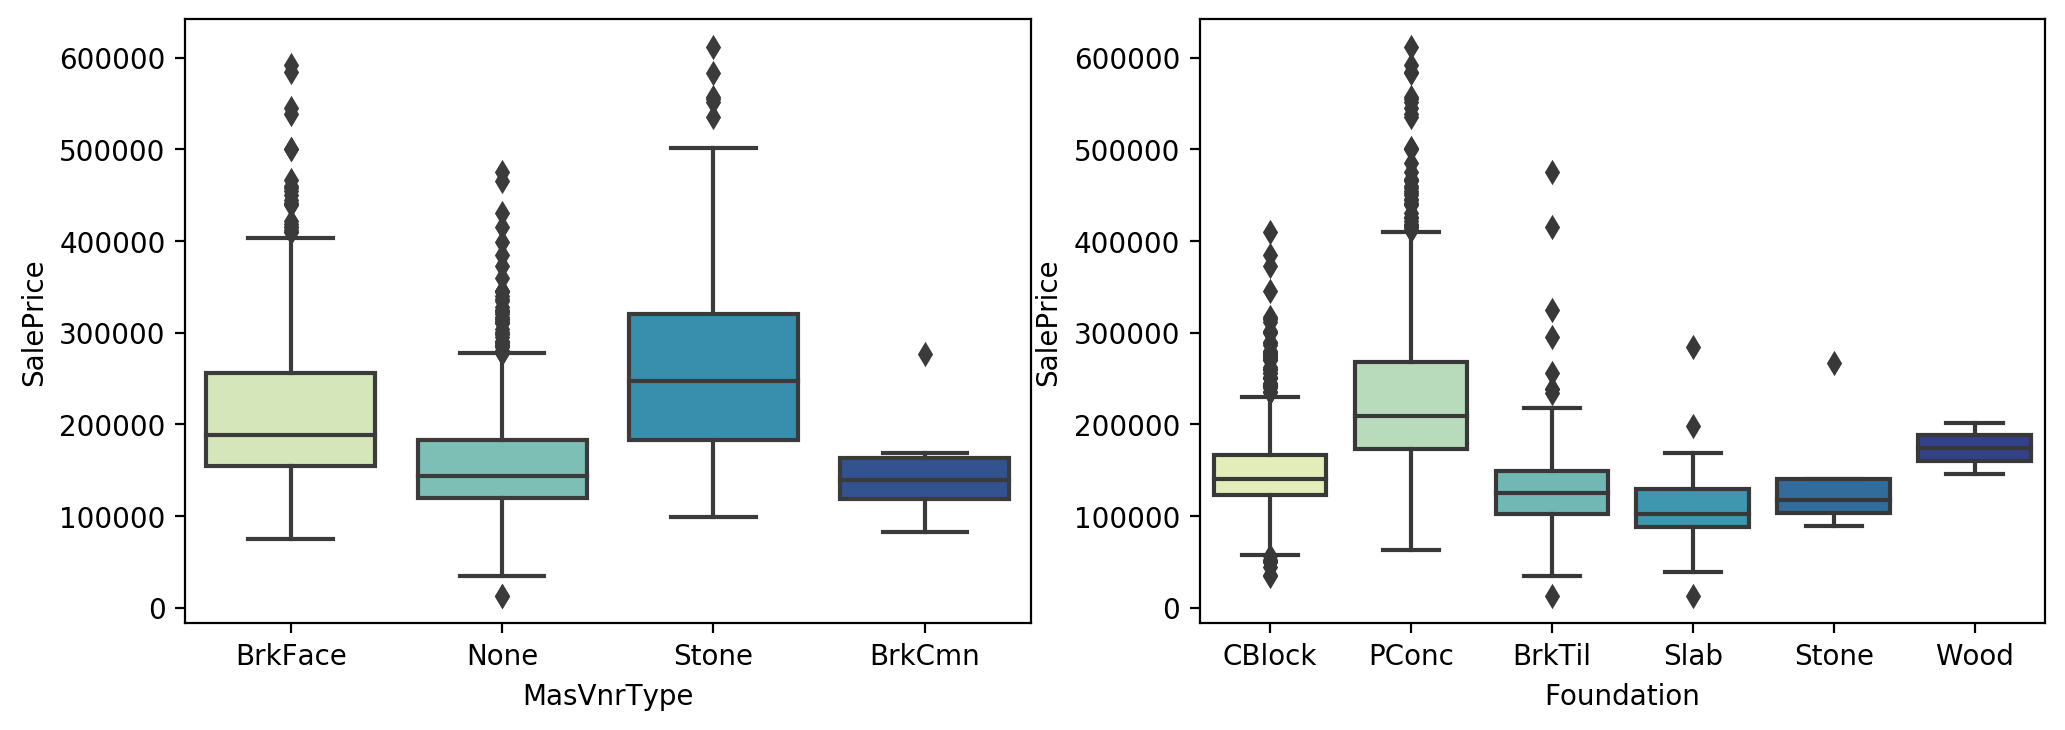

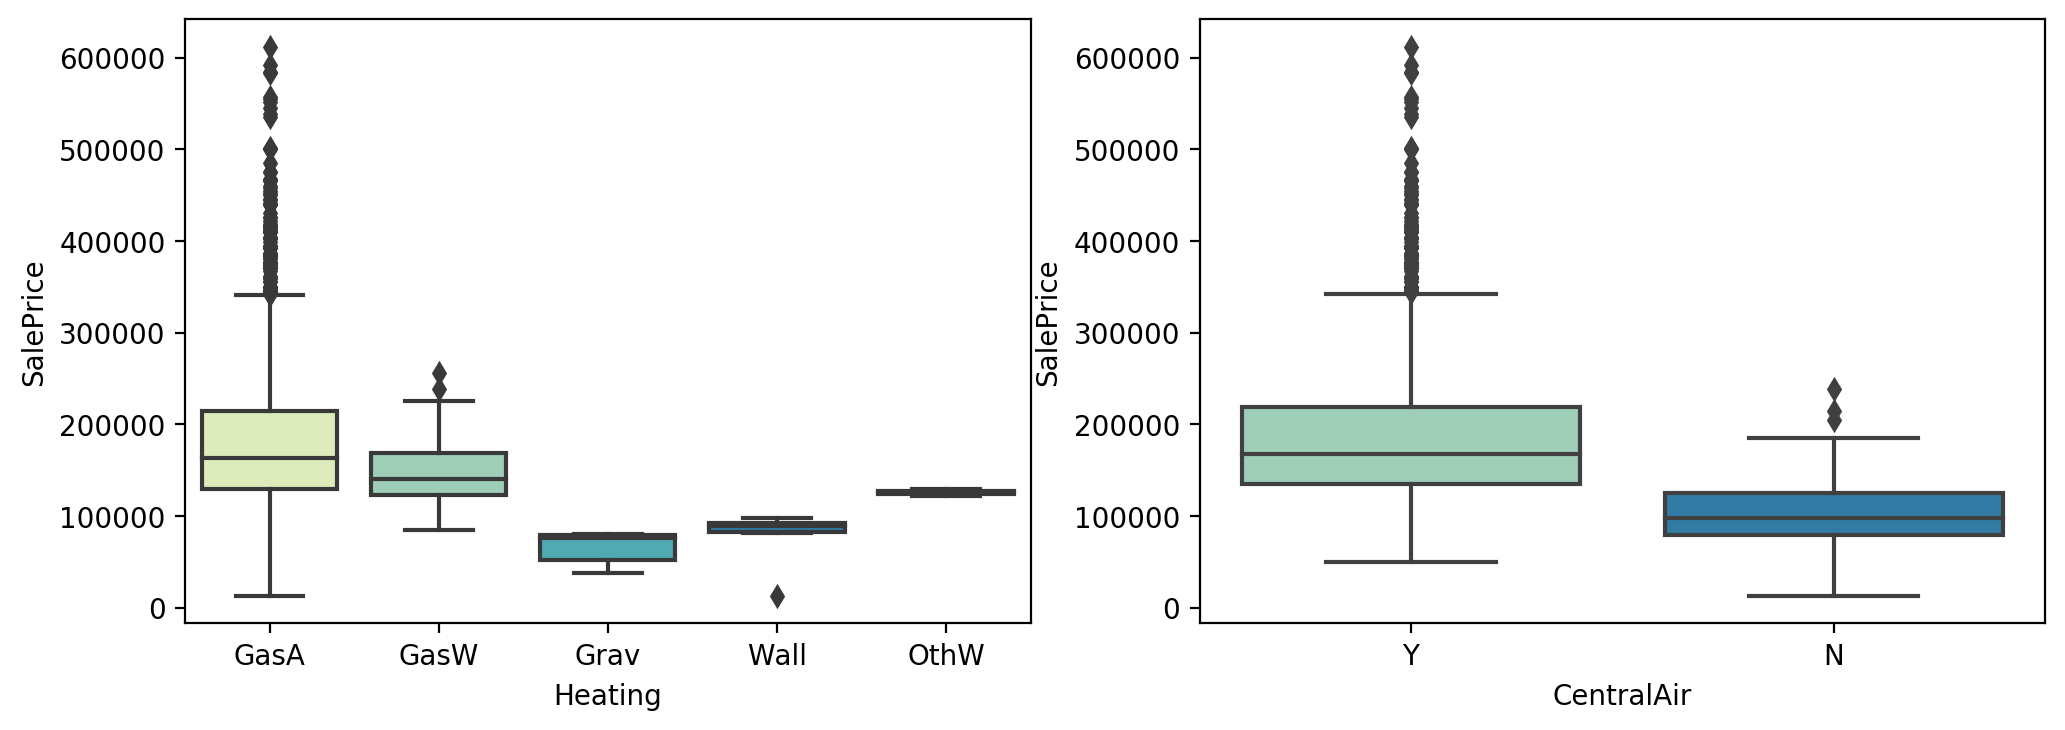

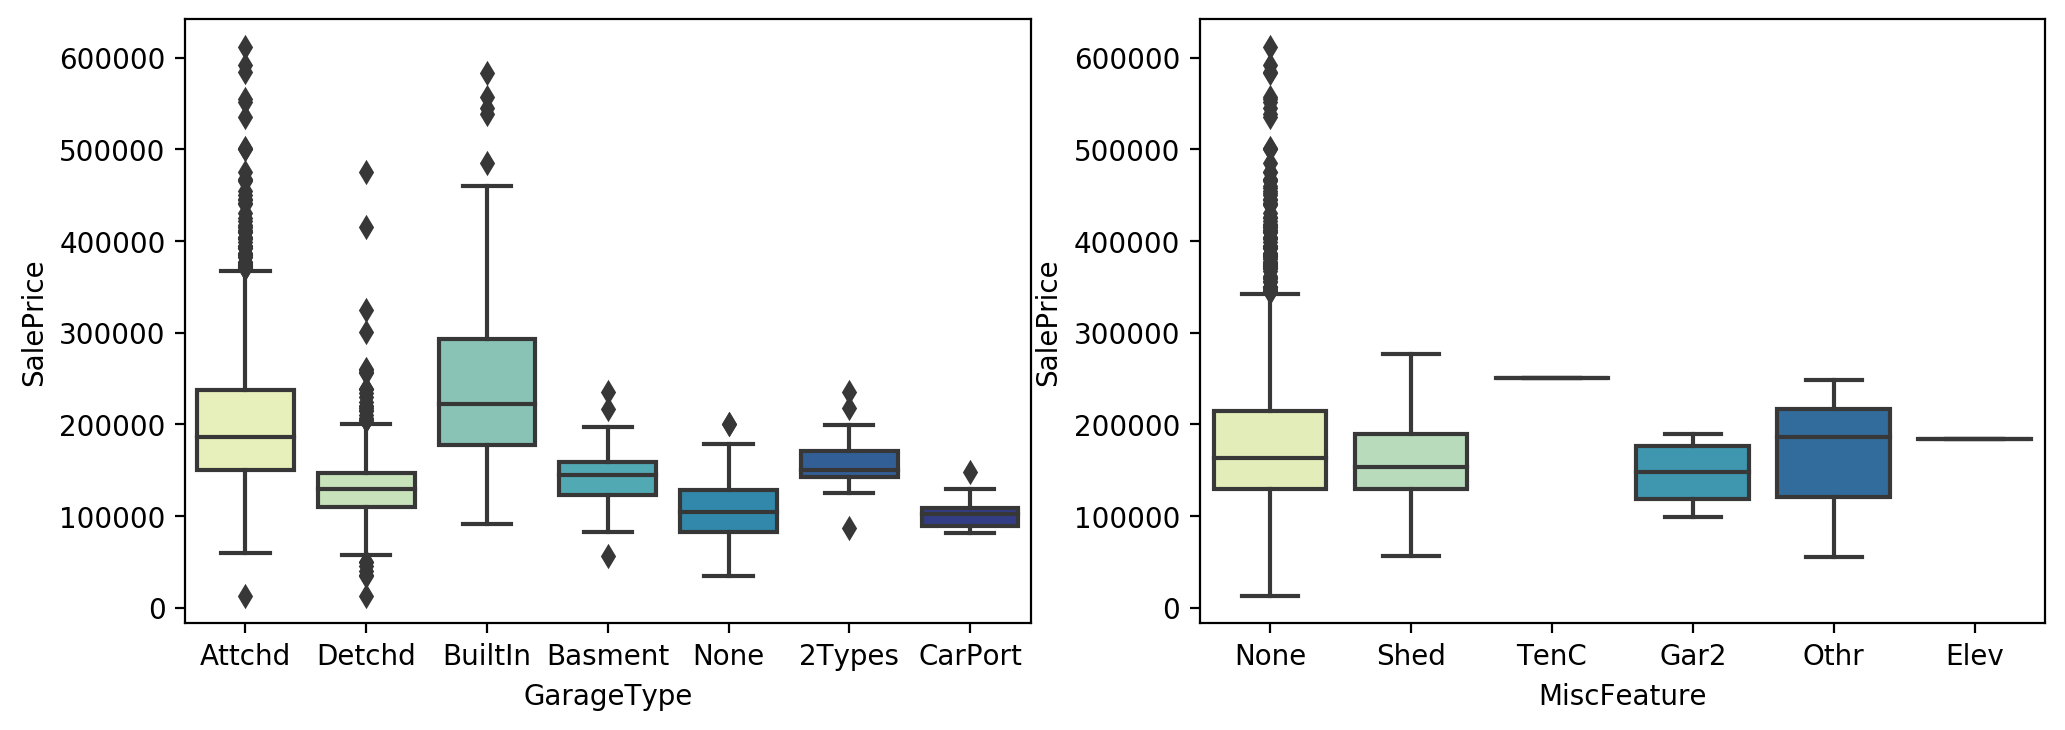

In [57]:
#Function to return boxplot with dataframe of ames_train and categorical
def boxplot(df, cols, ncols):
    
    #Set up subplot rows to house box plots.
    for lst in chunks(cols, ncols):
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(12, 4), dpi=100)
        
        #Loops through each column to plot a box plot in a row
        for idx in range(0, len(lst)):
            attr = lst[idx]
            data = pd.concat([ames_train['SalePrice'], ames_train[attr]], axis=1)
            sns.boxplot(x=attr, y='SalePrice', data=data, ax=axes[idx], palette='YlGnBu')

boxplot(ames_train, categorical1, 2)

Major observations:

1. SaleType: 
    * New (New homes just constructed and sold), and Con (contract 15% downpayment) fetch the highest prices.
    * These can be contrasted with the ConLW (Contract Low Down payment and low interest), ConLI (Contract Low Interest) and ConLD (Contract Low Down).
    * Those with WD (conventional warranty deeds) have the greatest number of outliers(greater than 3 standard deviation)


2. MSZoning:
    * FV (Floating Village Residential) and (RL) Residential Low Density have the highest prices.


3. Street: 
    * Pavement street have higher prices than gravel, perhaps because of the quality of finish. 


4. LandContour:
    * Highest prices observed for Lvl(Near Flat/Level) and HLS (Hillside - Significant slope from side to side). Hillside homes have always been associated with wealthy individuals and higher costs are involved in building a hillside homme. There is more clustering at the 50th to 75th percentile. There are more Lvl homes above the 75th percentile.


5. RoofMatl:
    * There is much variation among the different categories within roof material. WdShngl (Wood Shingles) which are most costly because it is labour intensive probably feature more in more expensive homes, adding to the overall quality of the homes. CompShg (Standard (Composite) Shingle) corresponds to the cheaper homes but there is also a lot of homes with CompShg fetching prices much higher than the 75th percentile. 

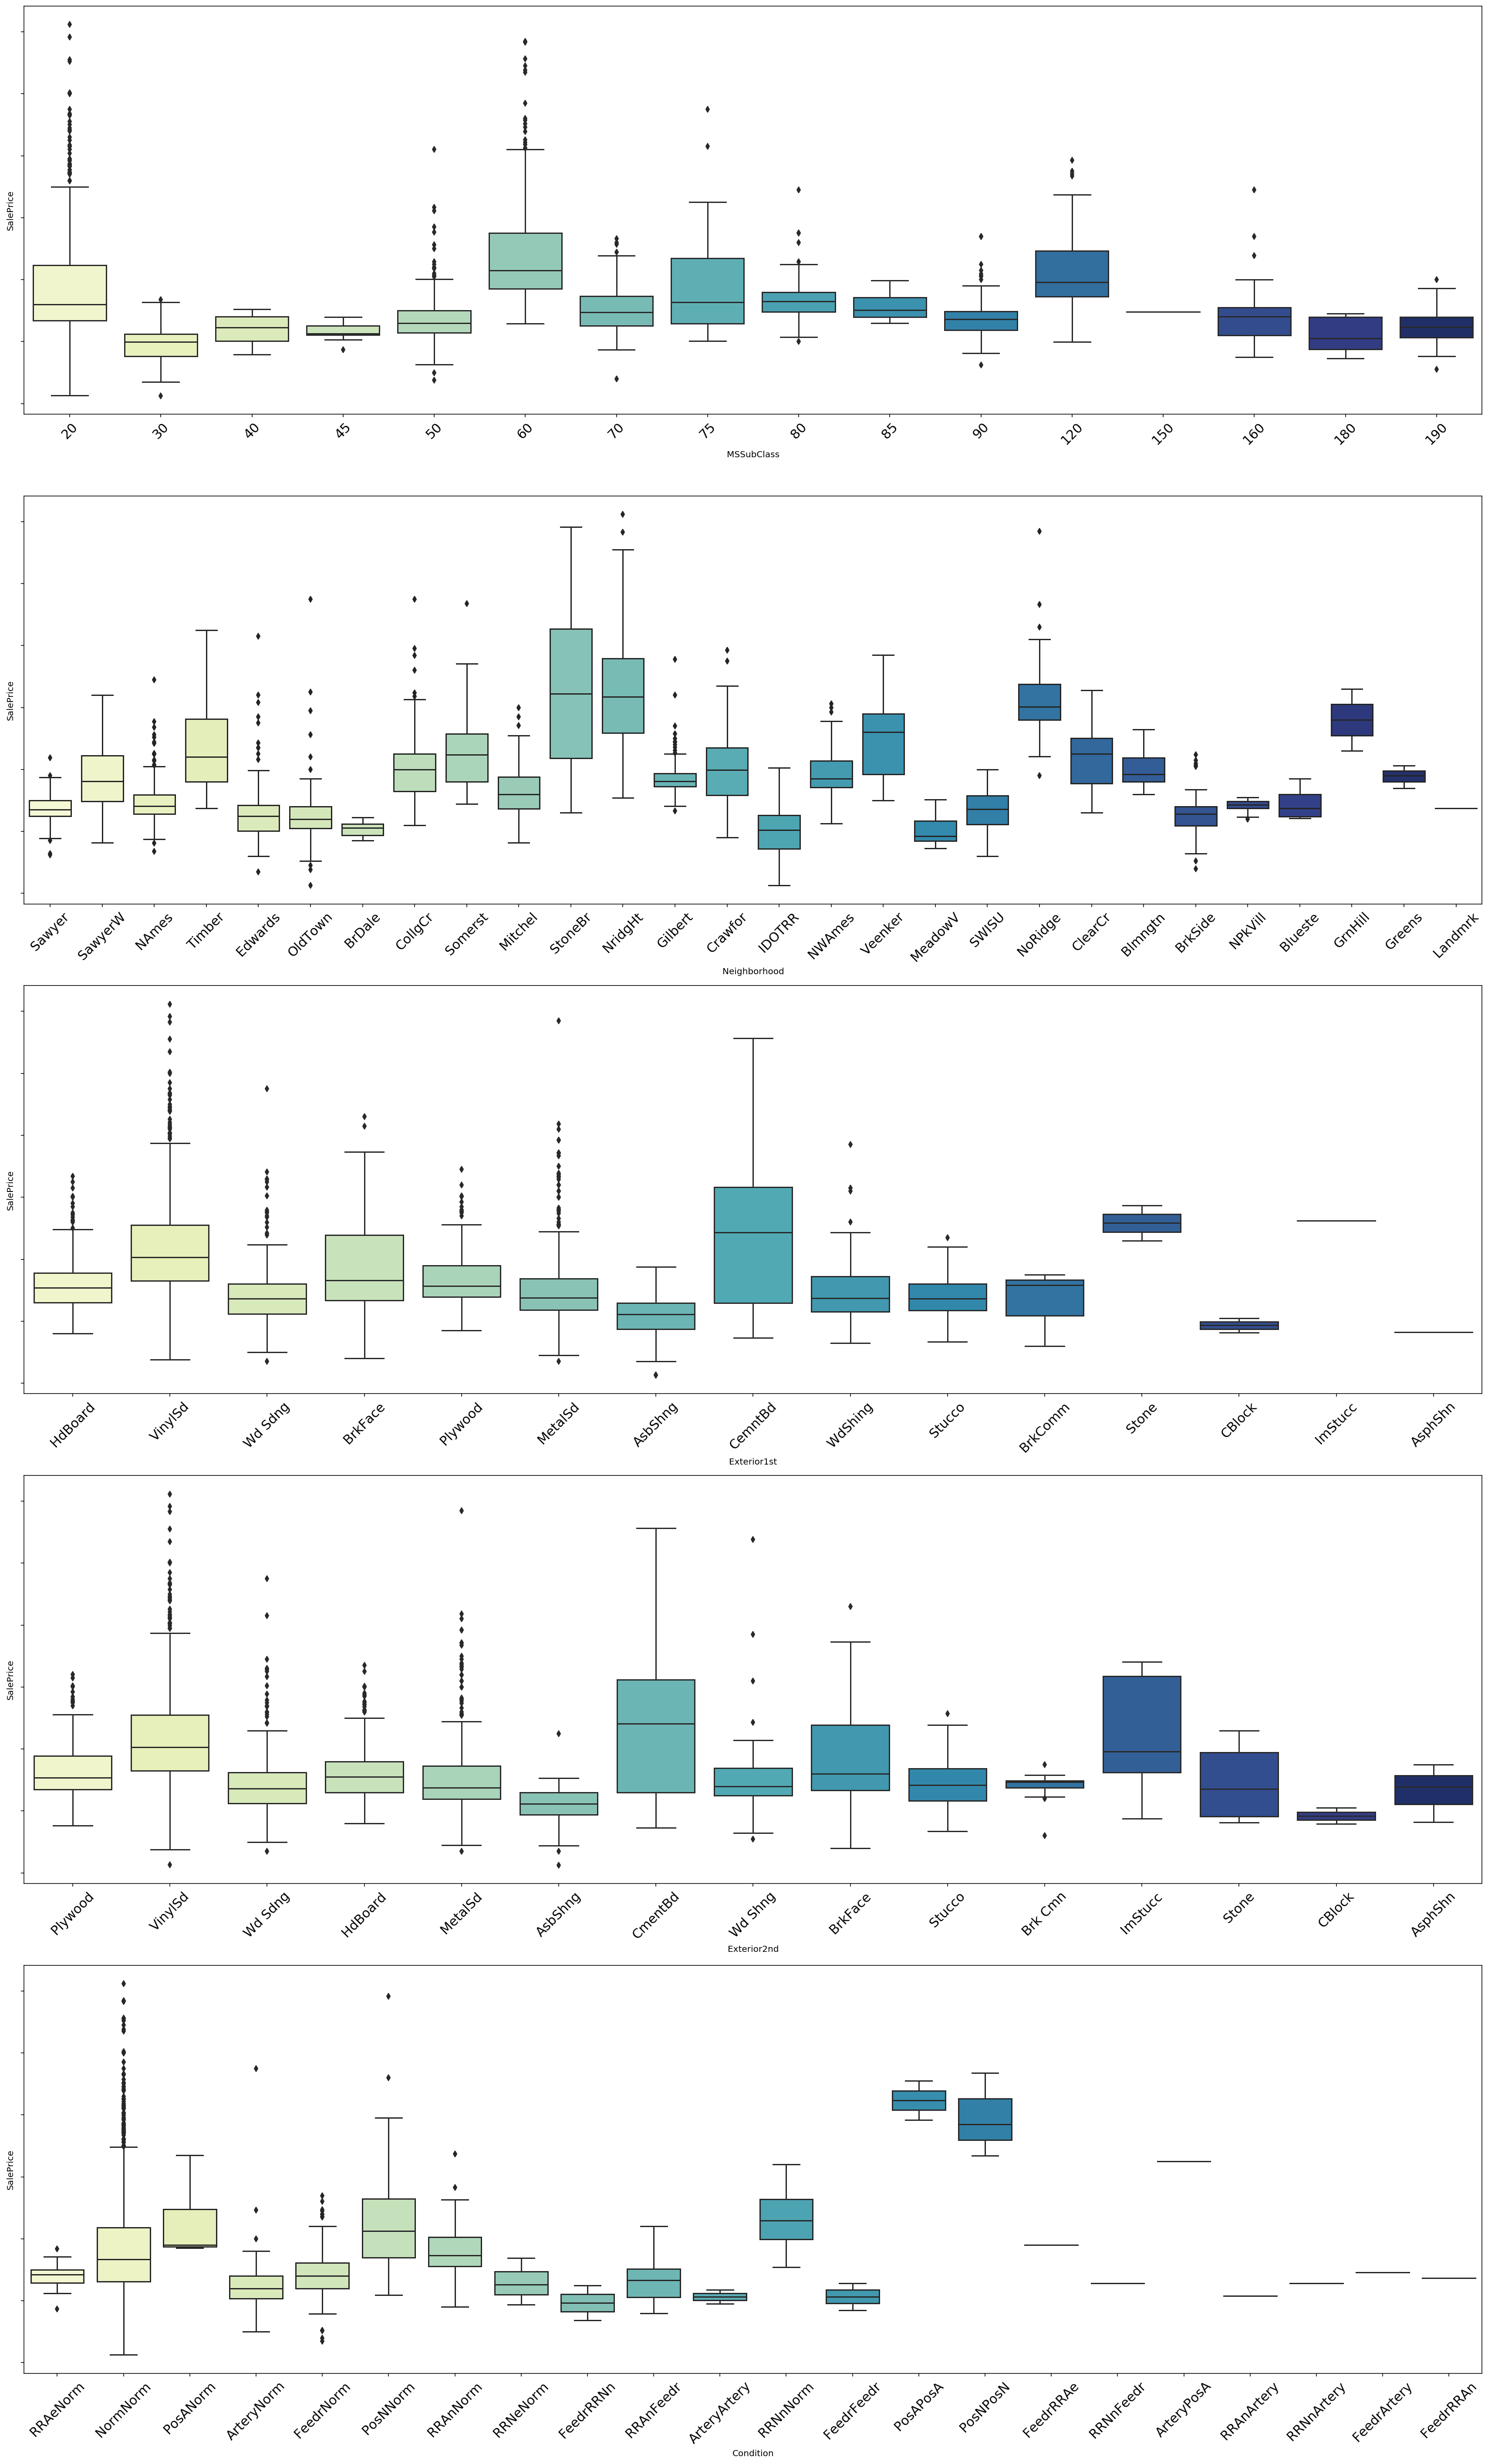

In [58]:
#Boxplot for Neighborhood, Exterior1st, Exterior2nd, MSSubClass
#Plotted separately from the rest because they have many categories each
categorical2 = ['MSSubClass', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'Condition']

fig, ax = plt.subplots(nrows=len(categorical2), figsize=(30,50))

for i, col in enumerate(categorical2):
    sns.boxplot(x=col, y='SalePrice', data=ames_train, ax=ax[i], palette='YlGnBu');
    ax[i].set_xticklabels(ax[i].xaxis.get_ticklabels(), fontsize=15, rotation=45)
    ax[i].set_yticklabels(ax[i].yaxis.get_ticklabels(), fontsize=15);

Major observations:

1. Neighborhood: 
    * Large variation in prices
    * Highest prices found in NridgHt (Northridge Heights) and StoneBr (Stone Brook). THese are probably bigger and pricier neighbourhoods compared to the rest. 


2. Condition: 
    * PosN (Near positive off-site feature--park, greenbelt, etc.) and PosA (Adjacent to postive off-site feature) fetch the highest prices. 

## Pre-processing

#### Processing Categorical Variables

In [59]:
#Getting the number of rows of train and test sets 
#so that we can split the concatenated dataset after processing
ntrain = ames_train.shape[0]
ntest = ames_test.shape[0]

In [60]:
#Concatenate the two data frames again so that we can get consistent dummies
all_ames = pd.concat((ames_train, ames_test))

Modify "quality" categorical columns from strings to integers since the quality categories have an order to them.

In [61]:
#Change columns that represent 'quality' into numeric columns

def change_quality_col(df, col, dict_values):
    for key,value in dict_values.items():
        df[col] = df[col].apply(lambda cell: cell.replace(key,str(value)))
    
    df[col] = df[col].astype(int)
    
    return

In [62]:
#Pick out columns that represent quality
quality_cols = ['ExterQual','ExterCond','KitchenQual','BsmtQual',
                'HeatingQC','FireplaceQu','GarageQual','GarageCond',
                'BsmtCond','PoolQC']

#Assign ordered numbers to the quality
dict_values = {'Ex': 5,
               'Gd' : 4,
               'TA' : 3,
               'Fa' : 2,
               'Po' : 1,
               'NA' : 0,
              'None': 0}

change_quality_col(all_ames, quality_cols, dict_values)

In [63]:
#Do the same for 'BsmtExposure'
col = 'BsmtExposure'
dict_values = {'Gd' : 4,
               'Av' : 3,
               'Mn' : 2,
               'None': 0,
               'No' : 1}

change_quality_col(all_ames, col, dict_values)

In [64]:
#Do the same for 'BsmtFinType1'
col = 'BsmtFinType1'
dict_values = {'GLQ': 6,
               'ALQ': 5,
               'BLQ': 4,
               'Rec': 3,
               'LwQ': 2,
               'Unf': 1,
               'None': 0}

change_quality_col(all_ames, col, dict_values)

In [65]:
#Do the same for 'BsmtFinType2'
col = 'BsmtFinType2'
dict_values = {'GLQ': 6,
               'ALQ': 5,
               'BLQ': 4,
               'Rec': 3,
               'LwQ': 2,
               'Unf': 1,
               'None': 0}

change_quality_col(all_ames, col, dict_values)

In [66]:
#Do the same for 'Fence'
col = 'Fence'
dict_values = {'GdPrv': 4,
               'MnPrv': 3,
               'GdWo': 2,
               'MnWw': 1,
               'None': 0}

change_quality_col(all_ames, col, dict_values)

In [67]:
#Do the same for 'Utilities'
col = 'Utilities'
dict_values = {'AllPub': 3,
               'NoSewr': 2,
               'NoSeWa': 1,
               'ELO': 0}

change_quality_col(all_ames, col, dict_values)

In [68]:
#Do the same for 'LotShape'
col = 'LotShape'
dict_values = {'Reg': 3,
               'IR1': 2,
               'IR2': 1,
               'IR3': 0}

change_quality_col(all_ames, col, dict_values)

In [69]:
#Do the same for 'LandSlope'
col = 'LandSlope'
dict_values = {'Gtl' : 3,
               'Mod' : 2,
               'Sev' : 1,
               'NA'  : 0}

change_quality_col(all_ames, col, dict_values)

In [70]:
col = 'GarageFinish'
dict_values = {'Fin' : 3,
               'RFn' : 2,
               'Unf' : 1,
               'None' : 0}

change_quality_col(all_ames, col, dict_values)

In [71]:
col = 'CentralAir'
dict_values = {'Y' : 1,
               'N' : 0}

change_quality_col(all_ames, col, dict_values)

In [72]:
col = 'Functional'
dict_values = {'Typ': 7,
               'Min1': 6,
               'Min2': 5,
               'Mod': 4,
               'Maj1': 3,
               'Maj2': 2,
               'Sev': 1,
               'Sal': 0}

change_quality_col(all_ames, col, dict_values)

Use pd.get_dummies to create dummies for categorical variables

In [73]:
categorical = ['SaleType', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'LandContour', 
               'Condition', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
               'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature',
               'MSSubClass', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'PavedDrive', 'Electrical']

In [74]:
#Get dummies and drop one of the dummies for each column
#to avoid multicollinearity
all_ames = pd.get_dummies(all_ames, columns=categorical, drop_first=True)

In [75]:
#Check the shape to see that the dummies have been assigned to the dataframe
print('There are now {} columns'.format(all_ames.shape[1]))

There are now 217 columns


In [76]:
#Split the train and test sets before removing outliers from the train set
ames_train = all_ames[:ntrain]
ames_test = all_ames[ntrain:]

#Check that they have similar number of rows as previous sets
print('Shape of train dataset: ', ames_train.shape)
print('Shape of test dataset: ', ames_test.shape)

Shape of train dataset:  (2050, 217)
Shape of test dataset:  (879, 217)


#### 2. Train/Test Split

In [77]:
X = ames_train.drop('SalePrice', axis=1)
y = ames_train['SalePrice']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 3. Scale Data

In [79]:
#Scale the data; fit and transform X_train first before transform X_test with the fitted X_train
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/yvettenee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Modeling

#### Baseline Score

In [80]:
#Baseline RMSE
(np.mean(np.square(y_test - np.mean(y_test)))) ** 0.5

79167.69340062863

The baseline score is 79167.69, which means that this metric will be what I would compare the RMSE from the models against. RMSE expresses the average model prediction error in units of the variable of interest, in this case, the dollars. It allows for easy comparison between predicted price and the actual price. 

#### Linear Regression

In [81]:
#Instantiate a linear regression
lr = LinearRegression()

#Linear regression cross validation score RMSE
lr_cv_rmse = np.sqrt(-cross_val_score(lr, X_train_sc, y_train, cv=3,
                                        scoring='neg_mean_squared_error')).mean()
lr_cv_r2 = cross_val_score(lr, X_train_sc, y_train, cv=3,).mean()

print('RMSE: ', lr_cv_rmse)
print('R-squared: ', lr_cv_r2)

RMSE:  1.9476237655111356e+16
R-squared:  -1.4922645456666751e+23


The cross validation RMSE is significantly higher than the baseline RMSE. R-squared is negative, indicating that ilnear regression does not follow the trend of the data and so it fits worse than a horizontal line. 
We have to tweak the model.

This is likely to be caused by the presence of multicollinearity as well as redundant variables in the data. The variables also do not follow normal distribution, which violates the assumption of linear regression. This can be tweaked later.

#### Ridge Regression

In [82]:
#Find optimal value of alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_sc, y_train)

print (optimal_ridge.alpha_)

434.7013158125026


/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
#Cross validate RMSE with the best alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_cv_rmse = np.sqrt(-cross_val_score(ridge, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=3)).mean()
ridge_cv_r2 = cross_val_score(ridge, X_train_sc, y_train, cv=3,).mean()

print('RMSE: ', ridge_cv_rmse)
print('R-squared: ', ridge_cv_r2)

RMSE:  31700.613040510056
R-squared:  0.8347404984707376


The RMSE is vastly better than the Linear Regression's RMSE. The r-squared is a lot higher than that of the linear regression too. This model is able to explain 83.4% of the variance observed in the data. Ridge is able to manage the multicollinearity and get a good out-of-sample result.

#### Lasso Regression

In [84]:
#Find optimal value of alpha
optimal_lasso = LassoCV(n_alphas=500, cv=3)
optimal_lasso.fit(X_train_sc, y_train)

print(optimal_lasso.alpha_)

1074.5661285801427


In [85]:
#Cross validate RMSE with the best alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_cv_rmse = np.sqrt(-cross_val_score(lasso, X_train_sc, y_train, 
                                         scoring='neg_mean_squared_error', cv=3)).mean()
lasso_cv_r2 = cross_val_score(lasso, X_train_sc, y_train, cv=3,).mean()

print('RMSE: ', lasso_cv_rmse)
print('R-squared: ', lasso_cv_r2)

RMSE:  33363.26028147597
R-squared:  0.8128753035364529


<details><summary>Ridge and lasso regressions both performed significantly better than linear regression.
Out of the two, ridge, with a lower RMSE and a higher R-squared performed slightly better than lasso.</summary>

The RMSE is the square root of the variance of the residuals. It indicates how close the observed data points are to the model’s predicted values. Since RMSE is in the same unit as the target variable, we can infer that lower values of RMSE indicate better fit.

It makes sense that lasso and ridge performed better since there are so many variables included in the model that could have led to multicollinearity in the linear regression. </details>

#### Tweaking Features to Improve Model

Recall that there were variables that do not follow the normal distribution.

There were also some outliers that were not removed so that we do not reduce the sample size. 
We can use log transformation to reduce the variation, which means that the extreme values would become reasonably better.

In [86]:
#Getting the number of rows of train and test sets 
#so that we can split the concatenated dataset after cleaning
ntrain = ames_train.shape[0]
ntest = ames_test.shape[0]

In [87]:
#Concatenate the two data frames again so that we can get consistent dummies
all_ames = pd.concat((ames_train, ames_test))

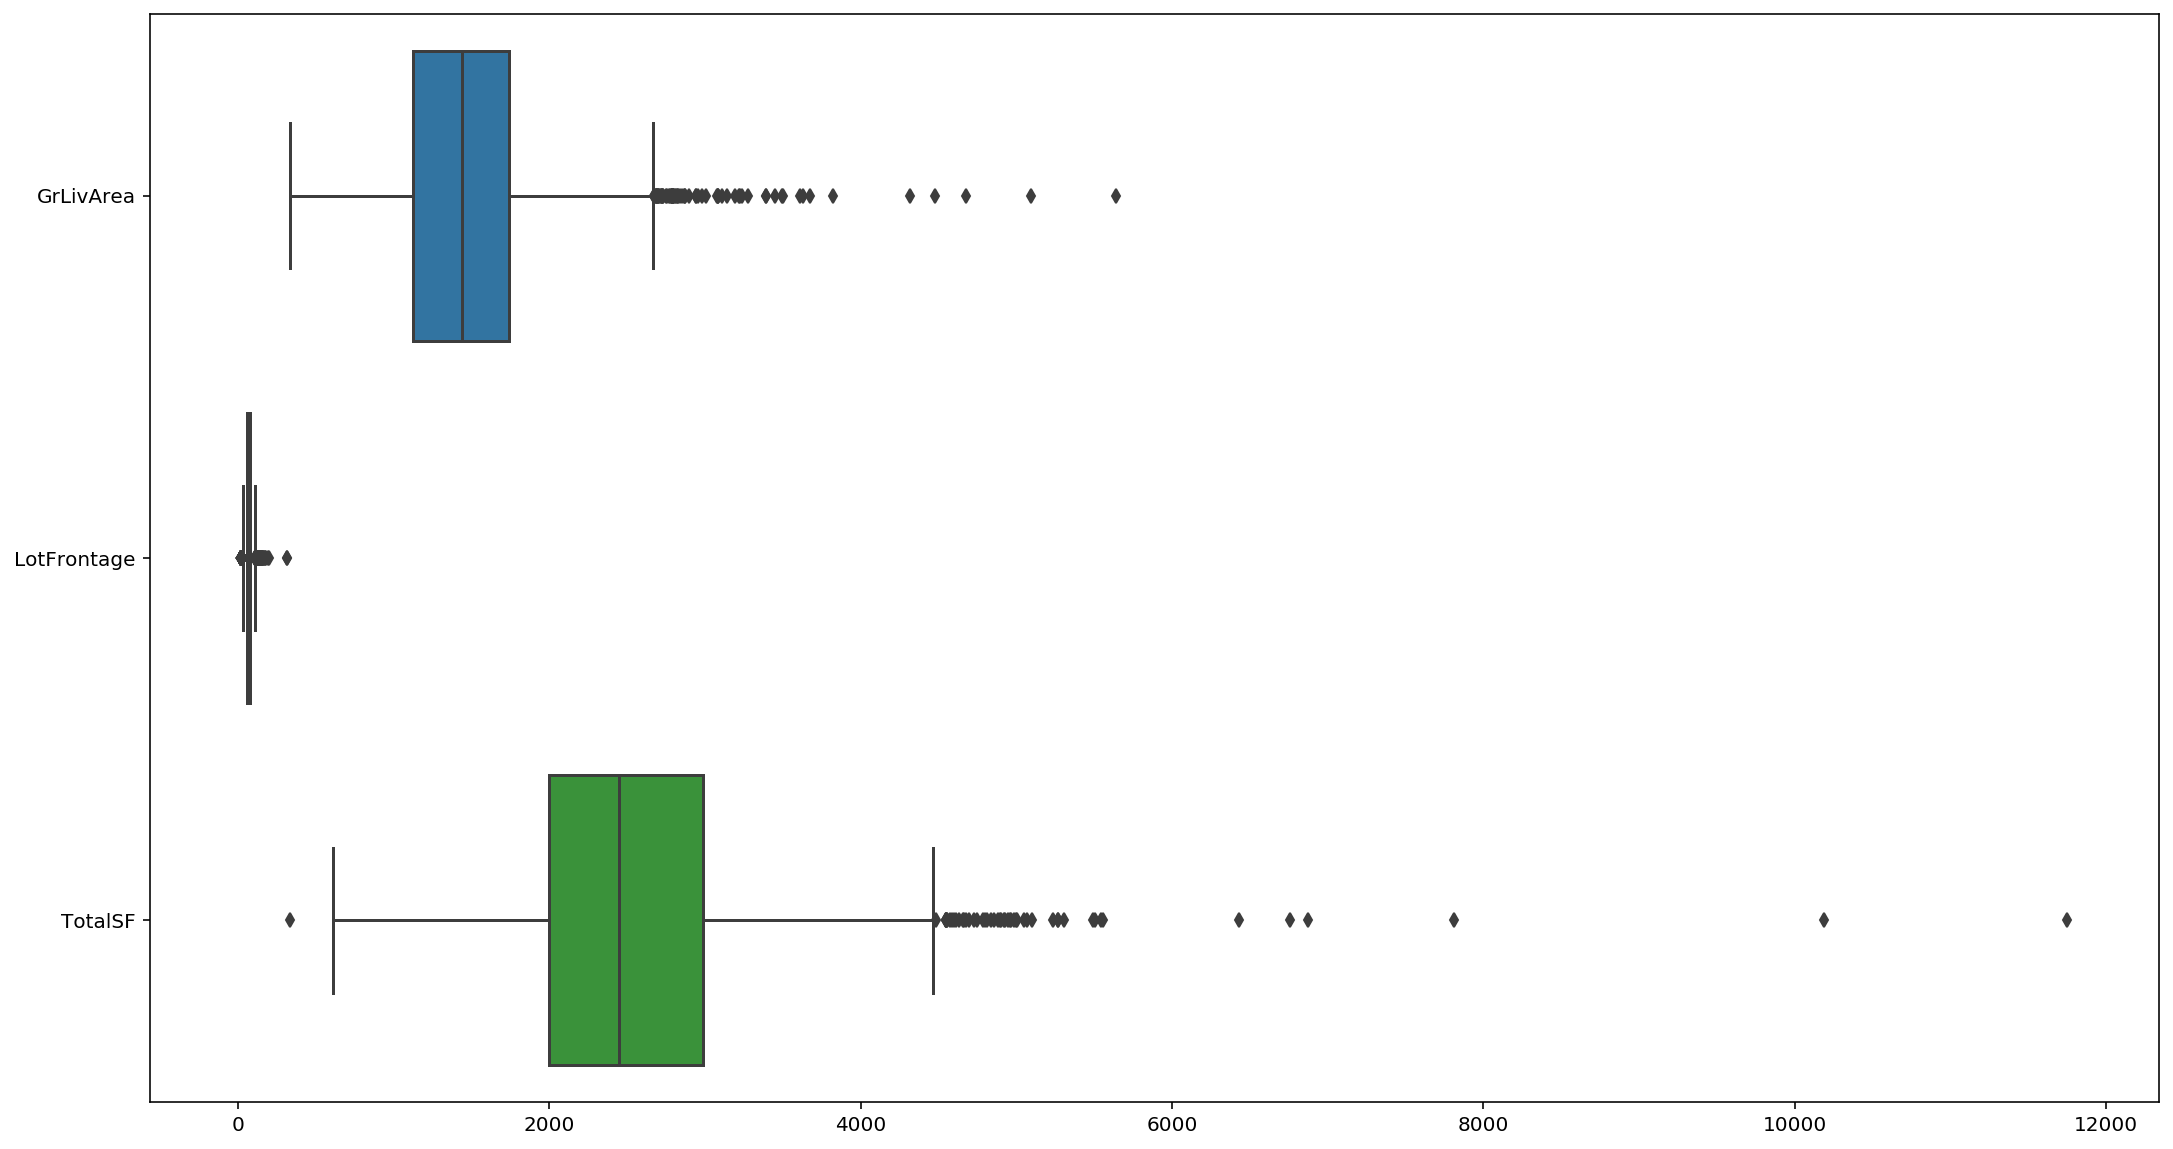

In [88]:
#Pick out some of the continuous variables to check out boxplot
#To identify outliers
plt.figure(figsize=(18,10))
sns.boxplot(data=all_ames[['GrLivArea','LotFrontage', 'TotalSF']], orient='h');

In [89]:
#Log transforming some of the outliers based on boxplots earlier
all_ames['GrLivArea'] = np.log(all_ames['GrLivArea'])
all_ames['LotFrontage'] = np.log(all_ames['LotFrontage'])
all_ames['TotalSF'] = np.log(all_ames['LotFrontage'])

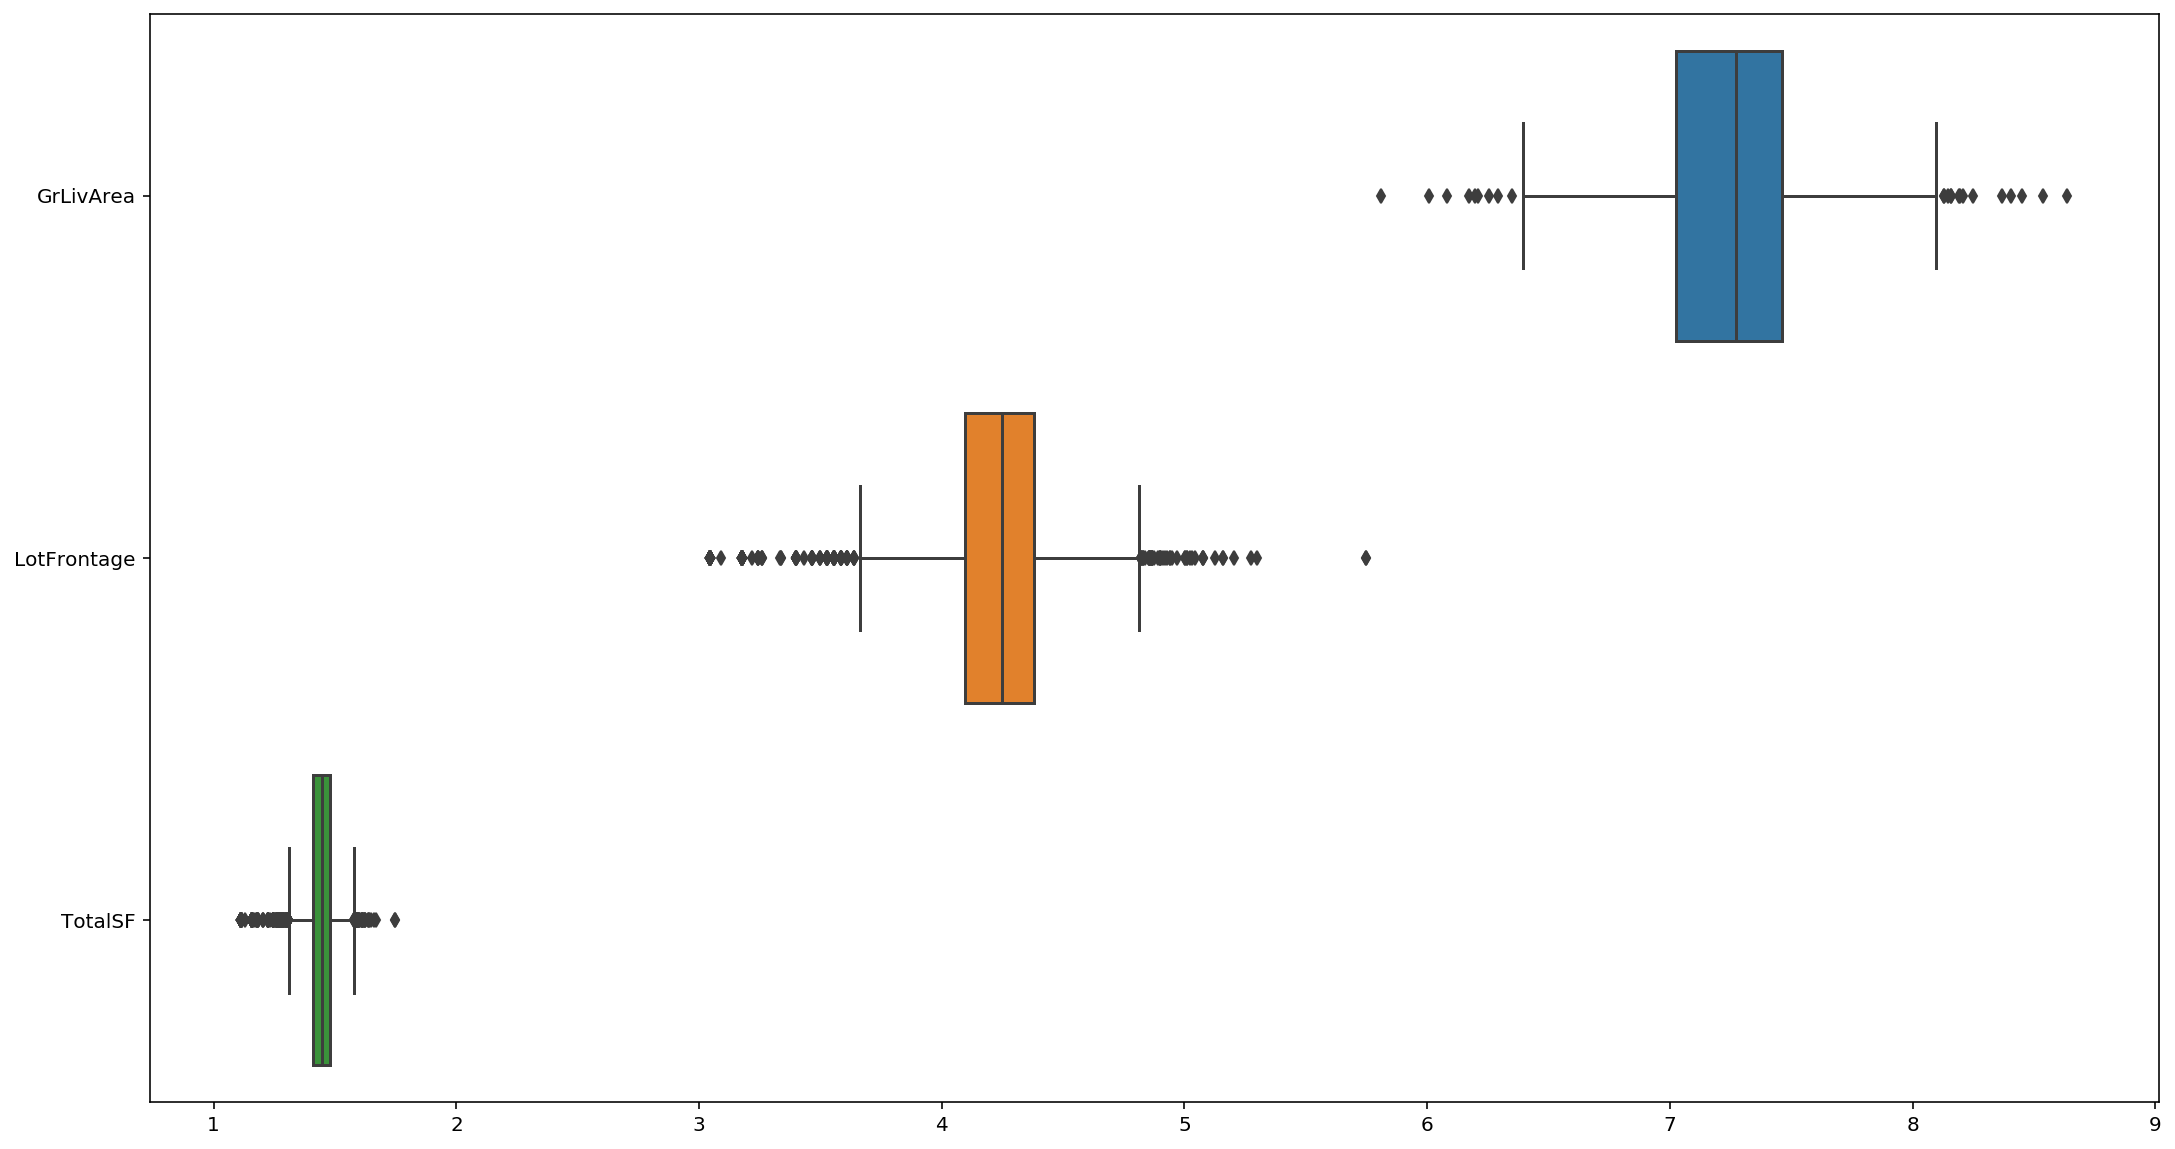

In [90]:
#plotting after transformation
plt.figure(figsize=(18,10))
sns.boxplot(data=all_ames[['GrLivArea','LotFrontage', 'TotalSF']], orient='h');

The distributions looks slightly closer to normal. The outliers are reduced, which will hopefully allow us to get better predictions.

In [91]:
#Split the train and test sets 
ames_train = all_ames[:ntrain]
ames_test = all_ames[ntrain:]

#Check that they have similar number of rows as previous sets
print('Shape of train dataset: ', ames_train.shape)
print('Shape of test dataset: ', ames_test.shape)

Shape of train dataset:  (2050, 217)
Shape of test dataset:  (879, 217)


In [92]:
#Drop 'SalePrice' from ames_test set
ames_test.drop('SalePrice', axis=1, inplace=True)

/Users/yvettenee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Rerun Regressions

In [93]:
X = ames_train.drop('SalePrice', axis=1)
y = ames_train['SalePrice']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
#Scale the data; fit and transform X_train first before transform X_test with the fitted X_train
ss = StandardScaler()

In [96]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/yvettenee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [97]:
#Instantiate a linear regression
lr = LinearRegression()

#Linear regression cross validation score RMSE
lr_cv_rmse = np.sqrt(-cross_val_score(lr, X_train_sc, y_train, cv=3,
                                        scoring='neg_mean_squared_error')).mean()
lr_cv_r2 = cross_val_score(ridge, X_train_sc, y_train, cv=3,).mean()

print('RMSE: ', lr_cv_rmse)
print('R-squared: ', lr_cv_r2)

RMSE:  1.049403603891583e+16
R-squared:  0.8450310126984686


The RMSE has dropped compared to the previous linear regression. R-squared also improved significantly.

In [98]:
#Find optimal value of alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_sc, y_train)

print (optimal_ridge.alpha_)

387.20387818125573


In [99]:
#Cross validate RMSE with the best alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_cv_rmse = np.sqrt(-cross_val_score(ridge, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=3)).mean()
ridge_cv_r2 = cross_val_score(ridge, X_train_sc, y_train, cv=3,).mean()

print('RMSE: ', ridge_cv_rmse)
print('R-squared: ', ridge_cv_r2)

RMSE:  30896.243618174183
R-squared:  0.8449820567069826


In [100]:
#Find optimal value of alpha
optimal_lasso = LassoCV(n_alphas=500, cv=3)
optimal_lasso.fit(X_train_sc, y_train)

print(optimal_lasso.alpha_)

1417.3386426961424


In [101]:
#Cross validate RMSE with the best alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_cv_rmse = np.sqrt(-cross_val_score(lasso, X_train_sc, y_train, 
                                         scoring='neg_mean_squared_error', cv=3)).mean()
lasso_cv_r2 = cross_val_score(lasso, X_train_sc, y_train, cv=3,).mean()

print('RMSE: ', lasso_cv_rmse)
print('R-squared: ', lasso_cv_r2)

RMSE:  32361.27574875587
R-squared:  0.828105450417473


The RMSE has dropped by a little for both ridge and lasso, indicating that we are in the right direction. R-squared also inched up a little. Ridge regression is chosen among the three models because it allows for the shrinking of coefficients and gives the lowest RMSE. Even though the linear regression model's R2 is marginally higher, the RMSE is too large. 

Ridge model is particularly helpful in this context because of the huge number of variables we have in the dataset.

Ridge Regression avoids over-fitting by adding a penalty to models that have too large coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets. In other words, ridge is optimised for prediction, unlike the linear regression model.

In [102]:
#Fit ridge regression
ridge.fit(X_train_sc, y_train)

#Predict using linear regression
preds = ridge.predict(X_test_sc)
#Get names of variables
features = ames_train.columns.drop('SalePrice')

print('The intercept is: ', ridge.intercept_)

The intercept is:  181682.6987638256


#### Inferential Visualisation

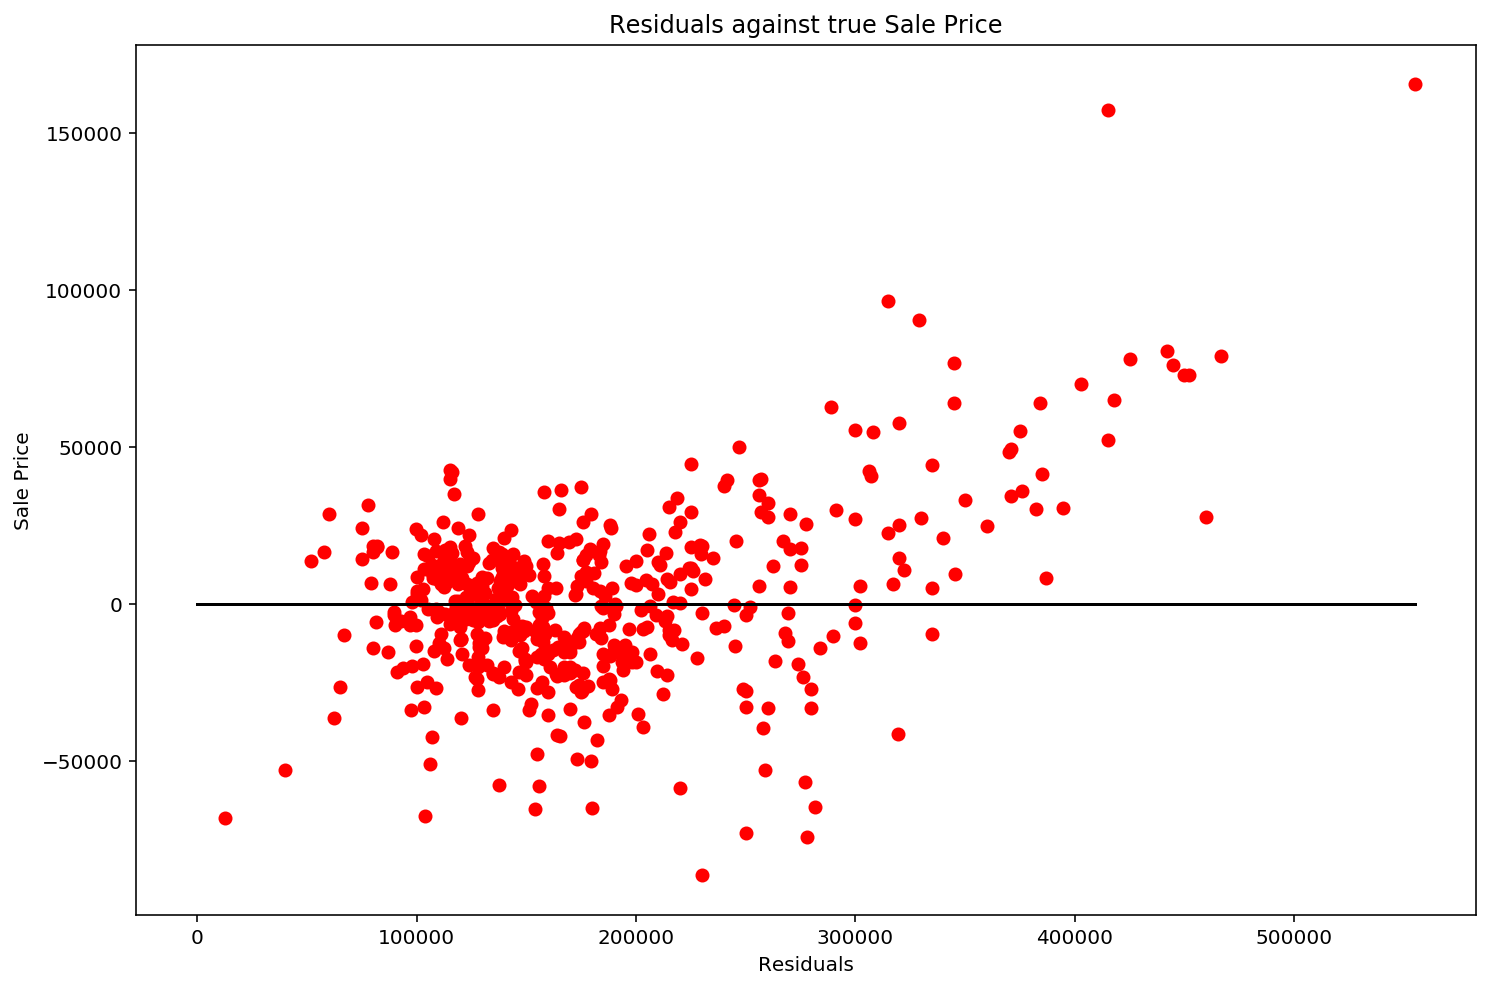

In [103]:
ridge_resid = y_test - ridge.predict(X_test_sc)

#Set figure size, title, x and y labels
plt.figure(figsize=(12,8))
plt.title('Residuals against true Sale Price')
plt.xlabel('Residuals')
plt.ylabel('Sale Price')

#Plot the scatter of residuals against the true values of sale price
plt.scatter(y=ridge_resid, x=y_test, c='r')

#Plot the line y=0
plt.plot([0,np.max(y_test)],[0,0], c='k');

We want our residuals to be as close to 0 as possible (depicted by the line y=0) because it would show us that the residuals are close to the true values. We can see a clustering of points close to the line y=0, which is a good sign.

#### Kaggle Submission

In [104]:
ss = StandardScaler()
#Fit ridge regression to test data
X_train_sc = ss.fit_transform(X_train)
X = ames_test
X_sc = ss.transform(X)
preds = ridge.predict(X_sc)

/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yvettenee/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/yvettenee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [105]:
sub = pd.DataFrame()
sub['Id'] = ames_test['Id']
sub['SalePrice'] = preds
sub.to_csv('../datasets/house_price_predictions_1.csv', index=False)

## Business Recommendations

In [106]:
print('The 20 top coefficients are: \n')
ridge_coefs = pd.DataFrame({'variable':X_train.columns,
                         'coef':ridge.coef_})

ridge_coefs.sort_values('coef', inplace=True, ascending=False)

ridge_coefs.head(20)

The 20 top coefficients are: 



variable         coef
20              GrLivArea  9193.530171
7             OverallQual  8898.812874
170  Neighborhood_NridgHt  7639.640459
176  Neighborhood_StoneBr  6696.975101
10              ExterQual  5875.124078
39              TotalBath  5839.585002
22            KitchenQual  5772.045716
14           BsmtExposure  5138.281216
9              MasVnrArea  4796.618703
41             TotalRooms  4646.496156
169  Neighborhood_NoRidge  4639.857149
28             GarageCars  4152.009270
18            TotalBsmtSF  3928.218602
29             GarageArea  3811.726870
47           SaleType_New  3734.273232
161  Neighborhood_GrnHill  3640.590854
12               BsmtQual  3563.851724
25            FireplaceQu  3520.179762
110      RoofMatl_WdShngl  3405.194840
64        LandContour_HLS  3397.552530

In [107]:
print('The 10 coefficients that affect the sale price most adversely: \n')
ridge_coefs.tail(10)

The 10 coefficients that affect the sale price most adversely: 



variable         coef
149        MSSubClass_160 -1731.649025
17              BsmtUnfSF -1916.526836
33                 PoolQC -1960.993201
99        RoofStyle_Gable -2079.611256
91        BldgType_TwnhsE -2461.299355
147        MSSubClass_120 -2606.977702
166    Neighborhood_NAmes -2655.875787
159  Neighborhood_Gilbert -2726.067504
38                    Age -2756.112012
158  Neighborhood_Edwards -2790.819782

#### Conclusion


The features that add the greatest value to homes are ground living area, which is the above grade (ground) living area square feet, overall quality of the homes and two of the neighbourhoods.
This makes sense because living area and quality of homes and neighbourhoods are important considerations in home purchases.

As we have seen that neighbourhoods play an important role in increasing sales prices, they also play an equally important role in reducing sales prices. So, the neighbourhoods that are good to ensure that prices are high, are Northridge Heights and Stone Brook. However, it is difficult to tell whether the prices will rise after purchase since the current price is already high. 

In order to ensure that the value of homes can be increased, homeowners can look into improving the overall quality of the homes and the quality of the material on the exterior. The exterior quality surprisingly increases the value of the home a lot, which probably means that first impressions count a lot in attracting higher bids for homes. 

This model is able to help sellers price their homes and to help buyers purchase homes at the 'correct' price. However, in order to be able to help buyers predict investment value, it would be good to have a time-series data to see the patterns of change so that we can more accurately predict changes moving forward. Other data including economic conditions (e.g. business cycles, interest rates) are also important in determining house prices. 

Overall, looking at the variables that have the highest coefficients, it seems that the model could be generalised to other cities. The reasons for variables such as square feet and overall quality of homes are quite self-explanatory and is generalisable throughout the world. However, to be able to weigh the importance of the finer details like preference for lot shape, porch space, garage and fireplace, we need information on their tastes and preferences by getting hold of data on population demography - age, income, race, etc. 


#### Kaggle Score

![](../images/Kaggle.png)